### 1.Load data


In [ ]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
# Đọc file dữ liệu
df_customer = pd.read_csv(
    r"D:\SELF STUDY\mazhocdata\python\capstone project\project\movie_ticket_data\movie_ticket_data\customer.csv"
)
df_campaign = pd.read_csv(
    r"D:\SELF STUDY\mazhocdata\python\capstone project\project\movie_ticket_data\movie_ticket_data\campaign.csv"
)
df_device = pd.read_csv(
    r"D:\SELF STUDY\mazhocdata\python\capstone project\project\movie_ticket_data\movie_ticket_data\device_detail.csv"
)
df_status = pd.read_csv(
    r"D:\SELF STUDY\mazhocdata\python\capstone project\project\movie_ticket_data\movie_ticket_data\status_detail.csv"
)
df_ticket = pd.read_csv(
    r"D:\SELF STUDY\mazhocdata\python\capstone project\project\movie_ticket_data\movie_ticket_data\ticket_history.csv"
)

### 2.Data cleaning


#### 2.1 data type,data null,data duplicate value


In [7]:
# Bảng customer
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [ ]:
# Chuyển đổi datatype của dob sang datetime
from datetime import datetime

df_customer["dob"] = pd.to_datetime(df_customer["dob"])

In [ ]:
df_customer["customer_id"].nunique()  # Kiểm tra số lượng khách hàng duy nhất

131400

In [11]:
# Bảng campaign
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [12]:
df_campaign.head()

,campaign_id,campaign_type
0,106460,direct discount
1,30040,direct discount
2,13810,voucher
3,78370,voucher
4,83700,voucher


In [ ]:
df_campaign["campaign_id"].nunique()  # Kiểm tra số lượng chiến dịch duy nhất

216

In [14]:
# Bảng deivice
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [ ]:
# Tạo function đếm số dòng null và tỷ lệ % của từng column
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame("null_count")
    newdf[["null_rate"]] = newdf[["null_count"]] / len(df)
    return newdf.sort_values(by="null_rate", ascending=False)

In [16]:
calc_null_rate(df_device)

,null_count,null_rate
model,7139,0.051029
device_number,1,0.000007
platform,0,0.000000


In [ ]:
# Thay thế null bằng 'Unknown' trong cột model
df_device["model"].fillna("Unknown", inplace=True)
# Xóa giá trị null trong cột devive_number
df_device.dropna(subset=["device_number"], inplace=True)
calc_null_rate(df_device)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\1448260494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_device['model'].fillna('Unknown', inplace=True)


,null_count,null_rate
device_number,0,0.0
model,0,0.0
platform,0,0.0


In [18]:
# Bảng status
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   description  8 non-null      object
 2   error_group  7 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [19]:
df_status.head()

,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please...,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect atte...,customer


In [20]:
# Bảng ticket
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [21]:
df_ticket.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder


In [ ]:
# Thay đổi data tyoe của cột time
df_ticket["time"] = pd.to_datetime(df_ticket["time"])

In [23]:
calc_null_rate(df_ticket)

,null_count,null_rate
ticket_id,0,0.0
customer_id,0,0.0
paying_method,0,0.0
theater_name,0,0.0
device_number,0,0.0
original_price,0,0.0
discount_value,0,0.0
final_price,0,0.0
time,0,0.0
status_id,0,0.0


In [ ]:
df_ticket["ticket_id"].nunique()  # Kiểm tra số lượng chiến dịch duy nhất

154725

In [ ]:
(df_ticket["ticket_id"].count()) - (
    df_ticket["ticket_id"].nunique()
)  # Kiểm tra ticket_id có duy nhất không

np.int64(102)

In [26]:
df_dup = df_ticket[df_ticket.duplicated(keep=False)]
df_dup.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
3555,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
3556,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
49730,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49731,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49876,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes


In [27]:
df_ticket.drop_duplicates(inplace=True)

In [28]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154725 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 15.3+ MB


#### 2.2 Join tables


In [ ]:
# Xuất phát từ bảng ticket để join các bảng còn lại
df_join_customer = pd.merge(df_ticket, df_customer, on="customer_id", how="left")
df_join_campaign = pd.merge(df_join_customer, df_campaign, on="campaign_id", how="left")
df_join_status = pd.merge(df_join_campaign, df_status, on="status_id", how="left")
df_join_all = pd.merge(df_join_status, df_device, on="device_number", how="left")

In [30]:
df_join_all.count()

ticket_id         154725
customer_id       154725
paying_method     154725
theater_name      154725
device_number     154725
original_price    154725
discount_value    154725
final_price       154725
time              154725
status_id         154725
campaign_id       154725
movie_name        154725
usergender        154725
dob               154725
campaign_type      91627
description       154725
error_group        21046
model             154647
platform          154647
dtype: int64

In [31]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,NaN,"iPhone13,1",mobile
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,NaN,browser,website
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,NaN,Order successful,NaN,Unknown,mobile
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,NaN,devicemodel,mobile
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,NaN,devicemodel,mobile


In [32]:
calc_null_rate(df_join_all)

,null_count,null_rate
error_group,133679,0.863978
campaign_type,63098,0.407807
platform,78,0.000504
model,78,0.000504
paying_method,0,0.000000
ticket_id,0,0.000000
customer_id,0,0.000000
theater_name,0,0.000000
device_number,0,0.000000
original_price,0,0.000000


In [ ]:
df_join_all.fillna("Unknown", inplace=True)  # Thay thế giá trị null bằng 'Unknown'

#### 2.3 Xem tất cả các giá trị có trong mỗi cột


In [34]:
df_join_all.nunique().sort_values(ascending=False)

ticket_id         154725
time              154725
device_number     126459
customer_id       119477
dob                11322
final_price         2715
original_price      1895
model               1215
movie_name           253
discount_value       242
campaign_id          211
theater_name         179
status_id              8
description            8
paying_method          5
error_group            4
campaign_type          4
usergender             3
platform               3
dtype: int64

In [ ]:
specific_col = [
    "movie_name",
    "description",
    "paying_method",
    "campaign_type",
    "usergender",
    "platform",
    "error_group",
]

for col in specific_col:
    print(col + ":", np.sort(df_join_all[col].unique().astype(str)))
    print("")
    print(".....................................")
    print("\r")

movie_name: ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pets'

### 3.Analyze


#### 3.1 Chân dung khách hàng


##### Phân bổ độ tuổi và giới tính


In [ ]:
# Tính số tuổi
today = date.today()
df_join_all["age"] = df_join_all["dob"].apply(
    lambda dob: today.year
    - dob.year
    - ((today.month, today.day) < (dob.month, dob.day))
)

In [ ]:
# Lấy ra danh sách khách hàng kèm độ tuổi và giới tính
df_cus = df_join_all.drop_duplicates(subset="customer_id")[
    ["customer_id", "age", "usergender", "dob"]
]

Text(0, 0.5, 'Số lượng khách hàng')

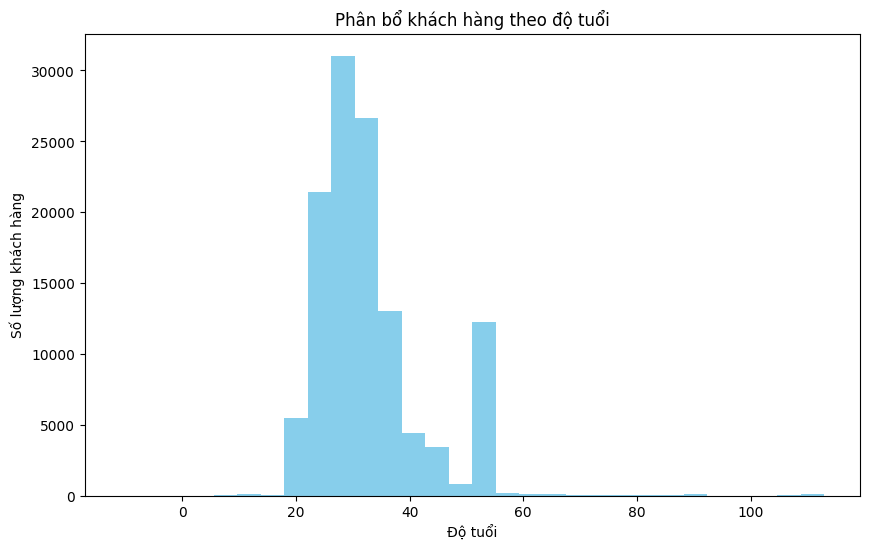

In [ ]:
# Phân bổ khách hàng theo độ tuổi
plt.figure(figsize=(10, 6))
plt.hist(df_cus["age"], bins=30, color="skyblue")
plt.title("Phân bổ khách hàng theo độ tuổi")
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng khách hàng")

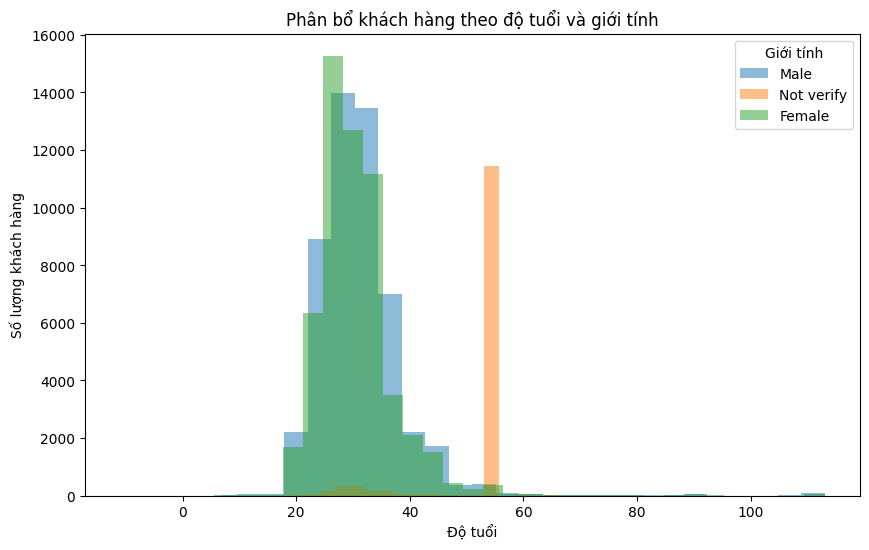

In [ ]:
# Phân bổ theo độ tuổi và giới tính
plt.figure(figsize=(10, 6))
usergender = df_cus["usergender"].unique()
for col in usergender:
    plt.hist(df_cus["age"][df_cus["usergender"] == col], bins=30, alpha=0.5, label=col)
plt.title("Phân bổ khách hàng theo độ tuổi và giới tính")
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng khách hàng")
plt.legend(title="Giới tính")
plt.show()

In [ ]:
# Đánh giá chi tiết nhóm Not verify
df_gen = (
    df_cus.groupby("usergender")
    .agg(total=("customer_id", "count"))
    .sort_values(by="total", ascending=False)
    .reset_index()
)
df_gen

,usergender,total
0,Female,55689
1,Male,50873
2,Not verify,12915


Text(0.5, 1.0, 'Tỷ trọng giới tính của khách hàng')

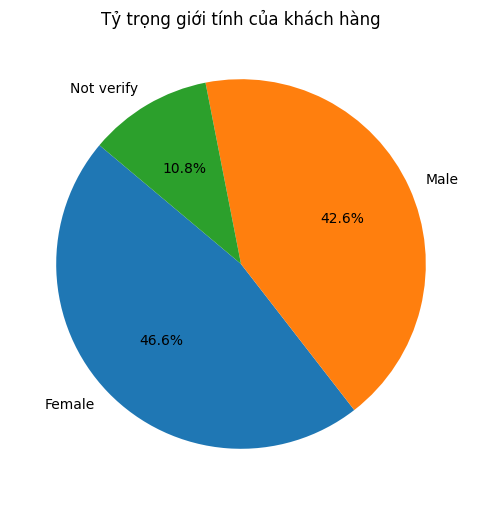

In [ ]:
# Tỷ trọng tỉ lệ giới tính
plt.figure(figsize=(8, 6))
plt.pie(df_gen["total"], labels=df_gen["usergender"], autopct="%1.1f%%", startangle=140)
plt.title("Tỷ trọng giới tính của khách hàng")

In [ ]:
df_cus[df_cus["usergender"] == "Not verify"].groupby("age").agg(
    total=("customer_id", "count")
).sort_values(by="total", ascending=False).reset_index().head(5)

,age,total
0,55,11435
1,30,126
2,29,118
3,27,115
4,31,114


###### Notes:

- Nhóm khách hàng not verify chiếm tới 11% dẫn tới 2 trường hợp:
  - Nếu họ nhập dob thì sẽ có data
  - Nếu họ không nhập thì mặc định là autofill 1970- 54 tuổi


In [ ]:
# Logic phân loại X,Y,Z,Baby boomers
df_cus["age_generation"] = df_cus["dob"].apply(
    lambda x: (
        "baby boomers"
        if x.year < 1965
        else "gen x" if x.year < 1981 else "gen y" if x.year < 1997 else "gen z"
    )
)

In [ ]:
df_gen_group = df_cus[df_cus["usergender"] != "Not verify"]

In [ ]:
df_gen_group = (
    df_cus[df_cus["usergender"] != "Not verify"]
    .groupby("age_generation")
    .agg(total=("customer_id", "count"))
    .sort_values(by="age_generation", ascending=False)
    .reset_index()
)

([<matplotlib.patches.Wedge at 0x2854b2cd090>,
 [Text(-0.9025476838931487, -0.628814502297071, 'gen z'),
  Text(0.9829567052366411, 0.4937571423587989, 'gen y'),
  Text(-0.8525518318061981, 0.695093787976771, 'gen x'),
  Text(-0.9429176562907136, 0.5664859163785346, 'baby boomers')],
 [Text(-0.4922987366689901, -0.3429897285256751, '36.0%'),
  Text(0.5361582028563496, 0.2693220776502539, '59.4%'),
  Text(-0.4650282718942898, 0.37914206616914775, '4.0%'),
  Text(-0.5143187216131164, 0.3089923180246552, '0.6%')])

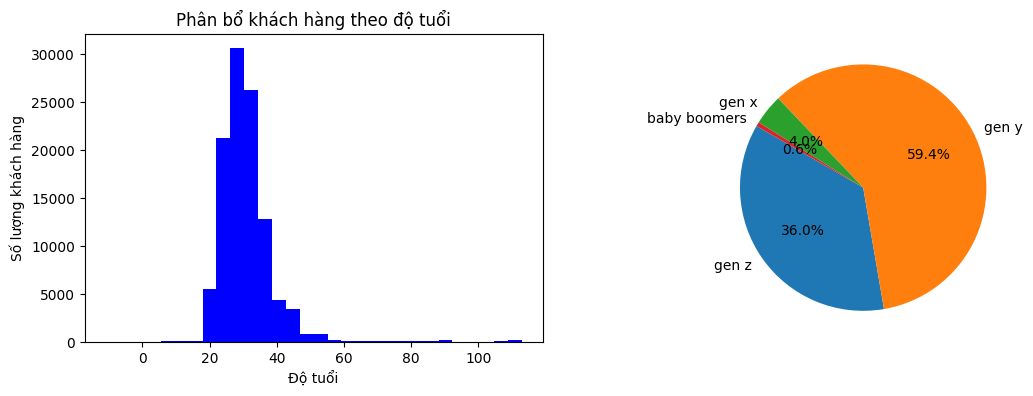

In [ ]:
# Kết hợp hai biểu đồ cùng lúc
plt.figure(figsize=(13, 4))
# plot 1
ax1 = plt.subplot(1, 2, 1)
df_cus[df_cus["usergender"] != "Not verify"]["age"].hist(
    bins=30, color="blue", grid=False
)
plt.title("Phân bổ khách hàng theo độ tuổi")
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng khách hàng")

# plot 2
ax2 = plt.subplot(1, 2, 2)
plt.pie(
    df_gen_group["total"],
    labels=df_gen_group["age_generation"],
    autopct="%1.1f%%",
    startangle=150,
)

#### 3.2 Dữ liệu chuỗi thời gian - Khách hàng mua vé khi nào


##### Xu hướng theo tháng


In [ ]:
df_join_all["month"] = pd.to_datetime(df_join_all["time"]).dt.month
df_join_all["name day"] = pd.to_datetime(df_join_all["time"]).dt.day_name()
df_join_all["hour"] = pd.to_datetime(df_join_all["time"]).dt.hour
df_join_all["year month"] = pd.to_datetime(df_join_all["time"]).dt.strftime("%Y-%m")
df_join_all.head(5)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age,month,name day,hour,year month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,Unknown,"iPhone13,1",mobile,36,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,Unknown,browser,website,34,7,Friday,20,2022-07
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,Unknown,Order successful,Unknown,Unknown,mobile,36,7,Saturday,11,2022-07
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,Unknown,devicemodel,mobile,28,7,Monday,22,2022-07
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,Unknown,devicemodel,mobile,37,7,Sunday,18,2022-07


In [ ]:
# Thống kê theo tháng
df_time_month = (
    df_join_all.groupby("year month")
    .agg(total_ticket=("ticket_id", "count"))
    .reset_index()
)
df_time_month.head(5)

,year month,total_ticket
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430


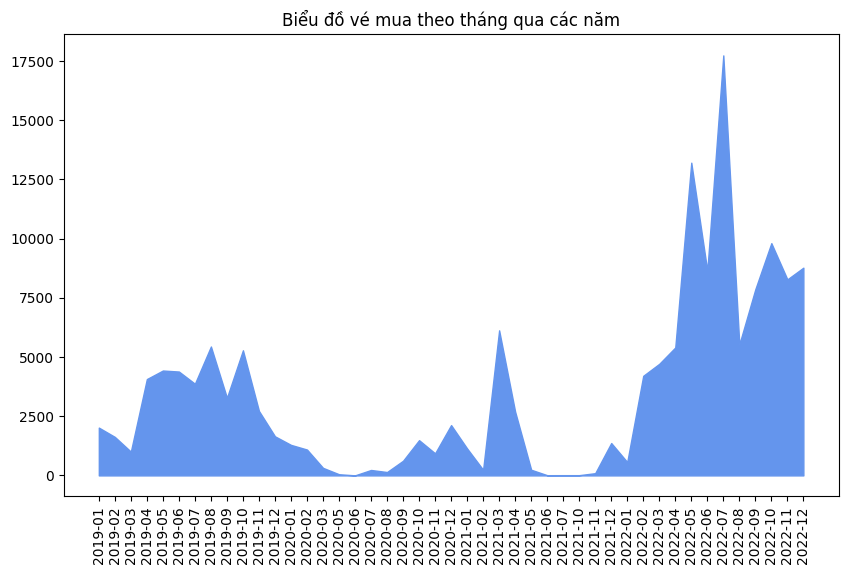

In [ ]:
# Biểu đồ theo tháng
plt.figure(figsize=(10, 6))
plt.fill_between(
    df_time_month["year month"], df_time_month["total_ticket"], color="cornflowerblue"
)
plt.xticks(rotation=90)
plt.title("Biểu đồ vé mua theo tháng qua các năm")
plt.show()

###### Note:

- Giai đoạn covid diễn ra -- ngta không đi xem phim
- Cần tạo bảng dim theo thời gian full (vì có các tháng không có dữ liệu)


In [ ]:
# Tạo bảng dimension

# Xác định khoảng thời gian
start_date = "2019-01-01"
end_date = "2022-12-31"

# Tạo ra range từ hai mốc thời gian
data_range = pd.date_range(start=start_date, end=end_date, freq="MS")

# Lấy ra phần tử tương ứng
list_month = data_range.month
list_month_name = data_range.strftime("%B")
list_year = data_range.year
list_year_month = data_range.strftime("%Y-%m")

# Khởi tạo dataframe
dim_time = pd.DataFrame(
    {
        "month_number": list_month,
        "month_name": list_month_name,
        "year": list_year,
        "year month": list_year_month,
    }
)

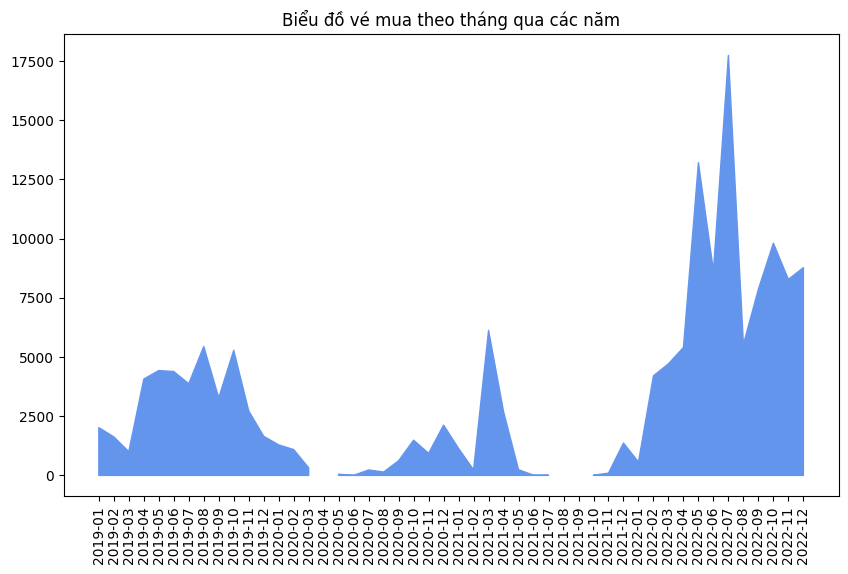

In [ ]:
# Join với bảng df_join_all để có đủ data thời gian
df_time_month_dim = (
    pd.merge(dim_time, df_join_all, how="left", on="year month")
    .groupby("year month")
    .agg(total_ticket=("ticket_id", "count"))
    .reset_index()
)
df_time_month_dim.replace(0, np.nan, inplace=True)
plt.figure(figsize=(10, 6))
plt.fill_between(
    df_time_month_dim["year month"],
    df_time_month_dim["total_ticket"],
    color="cornflowerblue",
)
plt.xticks(rotation=90)
plt.title("Biểu đồ vé mua theo tháng qua các năm")
plt.show()

##### Xu hướng theo tuần


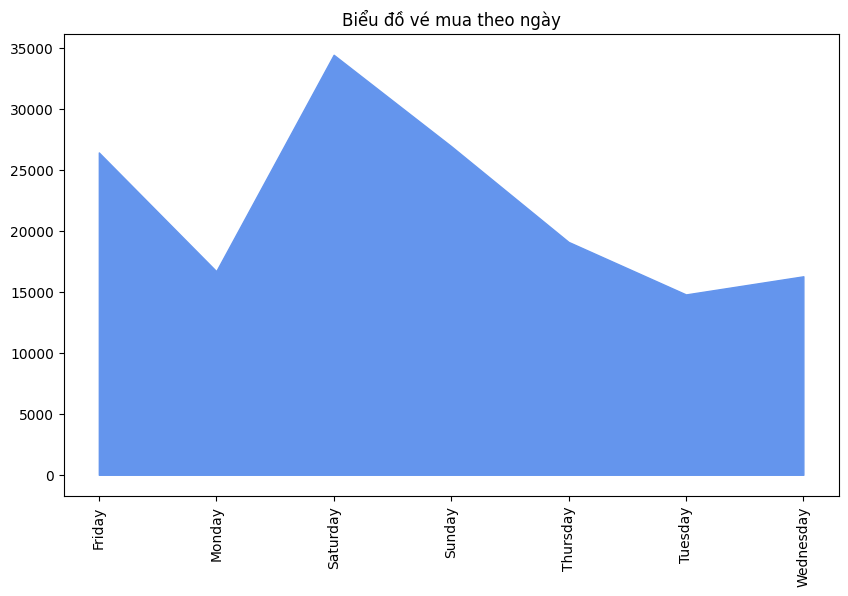

In [ ]:
df_weekday = (
    df_join_all.groupby("name day")
    .agg(total_ticket=("ticket_id", "count"))
    .reset_index()
)
plt.figure(figsize=(10, 6))
plt.fill_between(
    df_weekday["name day"], df_weekday["total_ticket"], color="cornflowerblue"
)
plt.xticks(rotation=90)
plt.title("Biểu đồ vé mua theo ngày")
plt.show()

In [ ]:
# Sắp xếp các ngày trong tuần

week_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
# Sắp xếp theo tứ tự các ngày trong tuần
df_weekday["day order"] = pd.Categorical(
    df_weekday["name day"], categories=week_order, ordered=True
)
df_weekday.sort_values(by="day order", inplace=True)
df_weekday

,name day,total_ticket,day order
1,Monday,16702,Monday
5,Tuesday,14793,Tuesday
6,Wednesday,16281,Wednesday
4,Thursday,19101,Thursday
0,Friday,26438,Friday
2,Saturday,34450,Saturday
3,Sunday,26960,Sunday


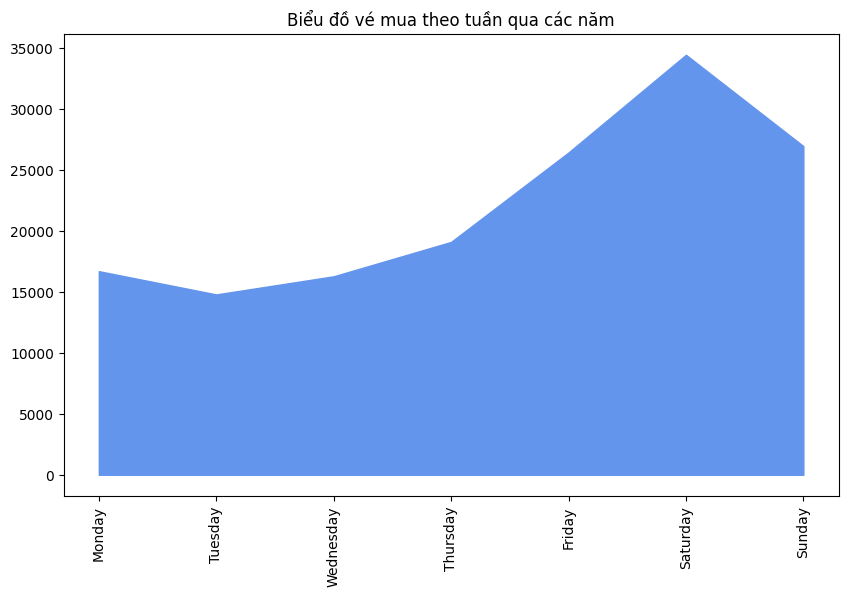

In [ ]:
plt.figure(figsize=(10, 6))
plt.fill_between(
    df_weekday["name day"], df_weekday["total_ticket"], color="cornflowerblue"
)
plt.xticks(rotation=90)
plt.title("Biểu đồ vé mua theo tuần qua các năm")
plt.show()

##### Xu hướng theo giờ


In [ ]:
df_hour = (
    df_join_all.groupby("hour").agg(total_ticket=("ticket_id", "count")).reset_index()
)

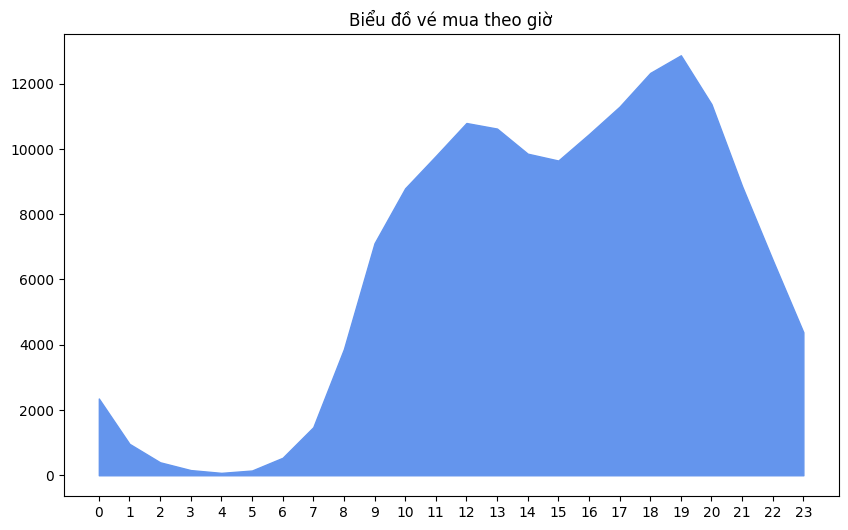

In [ ]:
plt.figure(figsize=(10, 6))
plt.fill_between(df_hour["hour"], df_hour["total_ticket"], color="cornflowerblue")
x_values = [i for i in range(24)]
plt.xticks(x_values)
plt.title("Biểu đồ vé mua theo giờ")
plt.show()

##### Tổng hợp các biểu đồ xu hướng theo tháng,ngày,giờ


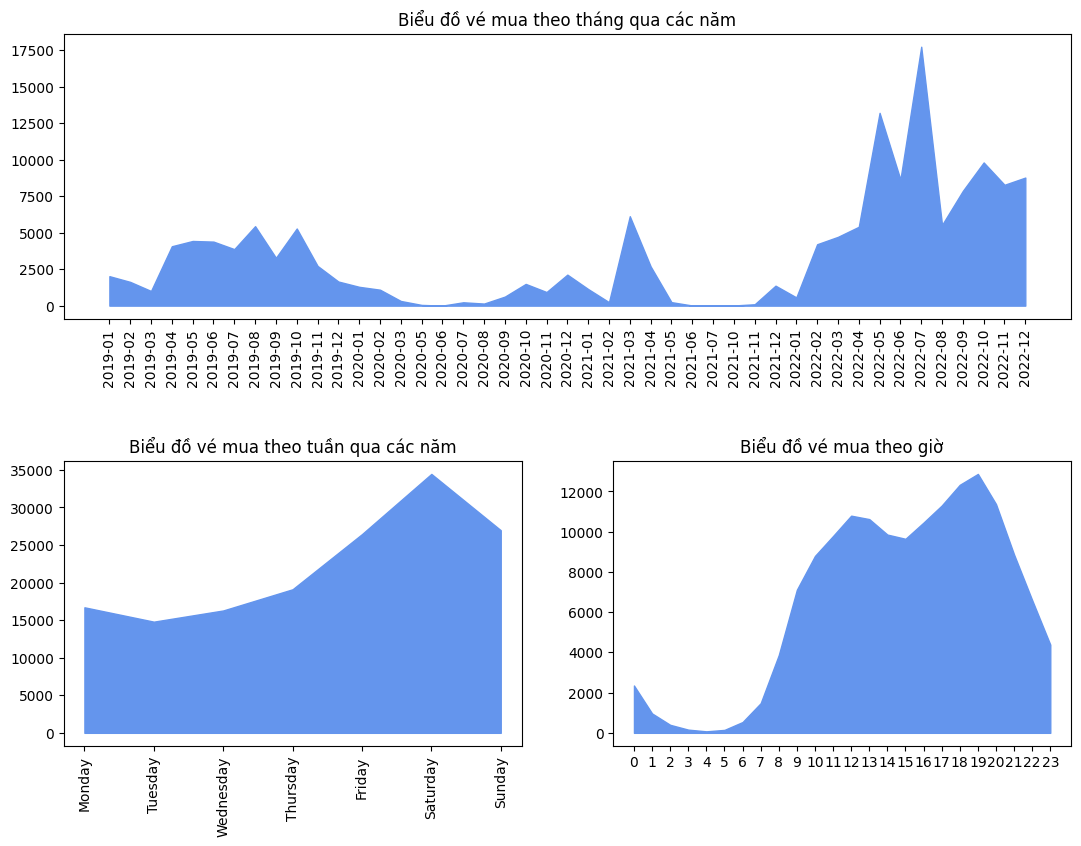

In [ ]:
# Vẽ chung trên 1 frame
plt.figure(figsize=(13, 8))

# Chart 1: Tháng
x1 = plt.subplot(2, 1, 1)
plt.fill_between(
    df_time_month["year month"], df_time_month["total_ticket"], color="cornflowerblue"
)
plt.xticks(rotation=90)
plt.title("Biểu đồ vé mua theo tháng qua các năm")


# Chart 2: theo ngày
x2 = plt.subplot(2, 2, 3)
plt.fill_between(
    df_weekday["name day"], df_weekday["total_ticket"], color="cornflowerblue"
)
plt.xticks(rotation=90)
plt.title("Biểu đồ vé mua theo tuần qua các năm")


# Chart 3: theo giờ
x3 = plt.subplot(2, 2, 4)
plt.fill_between(df_hour["hour"], df_hour["total_ticket"], color="cornflowerblue")
x_values = [i for i in range(24)]
plt.xticks(x_values)
plt.title("Biểu đồ vé mua theo giờ")

plt.subplots_adjust(hspace=0.5, top=1)

#### 3.3 Các yếu tố liên quan đến mua vé và thanh toán của khách


##### Nền tảng thanh toán


In [ ]:
# Theo thiết bị
df_platform = (
    df_join_all[df_join_all["platform"] != "Unknown"]
    .groupby("platform")
    .agg(total_ticket=("ticket_id", "count"))
    .reset_index()
)
df_platform

,platform,total_ticket
0,mobile,138136
1,website,16511


Text(0.5, 1.0, 'Biểu đồ thể hiện số lượng đặt vé qua các thiết bị')

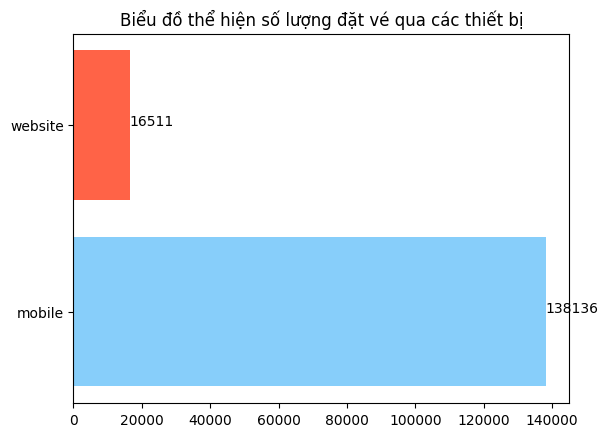

In [ ]:
# Biểu đồ cột ngang
plt.Figure(figsize=(15, 10))

plt.barh(
    df_platform["platform"],
    df_platform["total_ticket"],
    color=df_platform["platform"].replace(
        {"website": "tomato", "mobile": "lightskyblue"}
    ),
)
for index, value in enumerate(df_platform["total_ticket"]):
    plt.text(value, index, str(value))
plt.title("Biểu đồ thể hiện số lượng đặt vé qua các thiết bị")

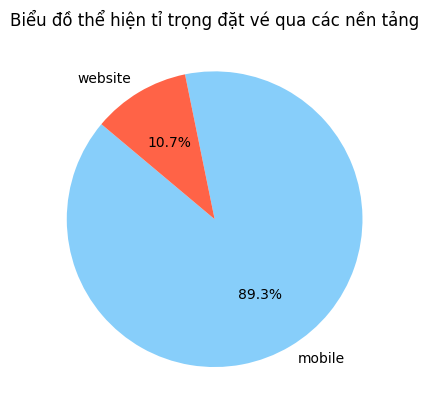

In [ ]:
# Biểu đồ tròn
plt.Figure(figsize=(10, 6))
plt.pie(
    df_platform["total_ticket"],
    labels=df_platform["platform"],
    autopct="%1.1f%%",
    startangle=140,
    colors=df_platform["platform"].replace(
        {"website": "tomato", "mobile": "lightskyblue"}
    ),
)
plt.title("Biểu đồ thể hiện tỉ trọng đặt vé qua các nền tảng")
plt.show()

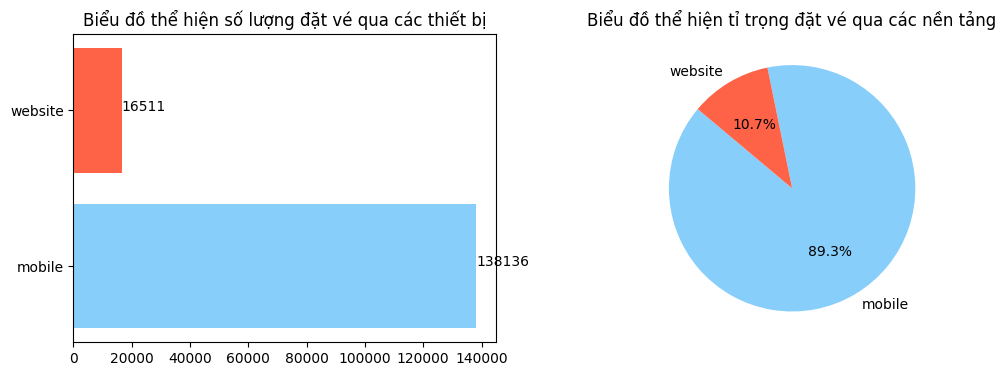

In [ ]:
#### Biểu diễn chung 1 frame
plt.figure(figsize=(12, 4))
# Chart 1
x1 = plt.subplot(1, 2, 1)
plt.barh(
    df_platform["platform"],
    df_platform["total_ticket"],
    color=df_platform["platform"].replace(
        {"website": "tomato", "mobile": "lightskyblue"}
    ),
)
for index, value in enumerate(df_platform["total_ticket"]):
    plt.text(value, index, str(value))
plt.title("Biểu đồ thể hiện số lượng đặt vé qua các thiết bị")

# Chart 2
x2 = plt.subplot(1, 2, 2)
plt.pie(
    df_platform["total_ticket"],
    labels=df_platform["platform"],
    autopct="%1.1f%%",
    startangle=140,
    colors=df_platform["platform"].replace(
        {"website": "tomato", "mobile": "lightskyblue"}
    ),
)
plt.title("Biểu đồ thể hiện tỉ trọng đặt vé qua các nền tảng")
plt.show()

In [ ]:
# Theo thời gian
df_platform_time = (
    df_join_all[df_join_all["platform"] != "Unknown"]
    .groupby(["year month", "platform"])
    .agg(total_ticket=("ticket_id", "count"))
    .sort_values(by="year month", ascending=True)
    .reset_index()
)
df_platform_time.head()

,year month,platform,total_ticket
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430


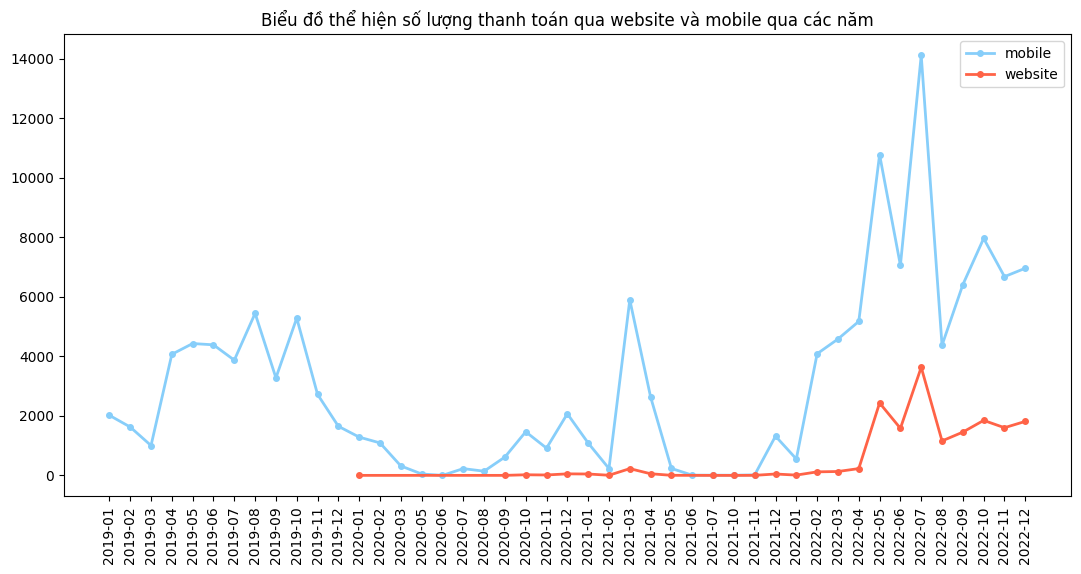

In [ ]:
# Biểu đồ line chart
plt.figure(figsize=(13, 6))

df_mobile_line = df_platform_time[df_platform_time["platform"] == "mobile"]
plt.plot(
    df_mobile_line["year month"],
    df_mobile_line["total_ticket"],
    label="mobile",
    marker="o",
    color="lightskyblue",
    linewidth=2,
    markersize=4,
)

df_website_line = df_platform_time[df_platform_time["platform"] == "website"]
plt.plot(
    df_website_line["year month"],
    df_website_line["total_ticket"],
    label="website",
    marker="o",
    color="tomato",
    linewidth=2,
    markersize=4,
)

plt.legend()
plt.xticks(rotation=90)
plt.title("Biểu đồ thể hiện số lượng thanh toán qua website và mobile qua các năm")
plt.show()

##### Thiết bị thanh toán


In [64]:
# Phân loại thiết bị thành các nhóm
df_join_all["os_version"] = df_join_all["model"].apply(
    lambda x: (
        "ios"
        if ("iPhone" in x or "iPod" in x)
        else (
            "browser"
            if x == "browser"
            else (
                "Unknown"
                if ("devicemodel" in x or "Unknown" in x)
                else "android and other"
            )
        )
    )
)

df_join_all["os_version"].unique()

array(['ios', 'browser', 'Unknown', 'android and other'], dtype=object)

In [ ]:
df_os = (
    df_join_all.groupby("os_version")
    .agg(total_ticket=("ticket_id", "count"))
    .sort_values(by="total_ticket", ascending=True)
    .reset_index()
)
df_os

,os_version,total_ticket
0,browser,13377
1,android and other,21092
2,ios,51402
3,Unknown,68854


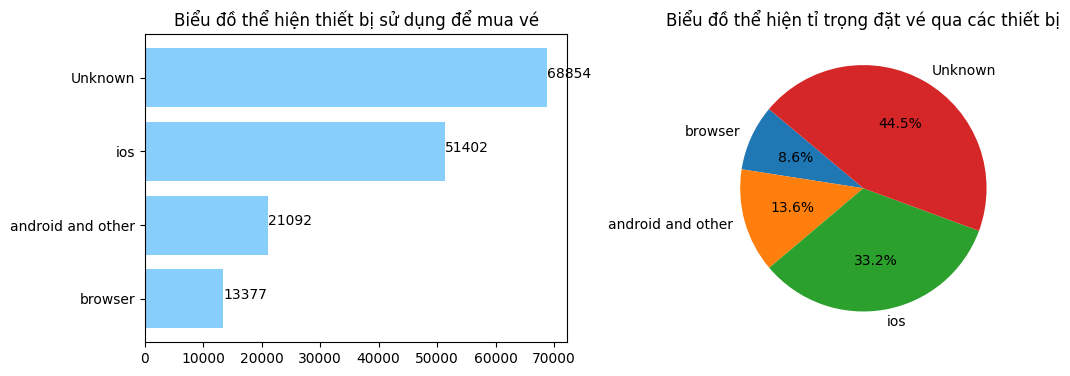

In [ ]:
# Biểu đồ cột ngang
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 2, 1)
plt.barh(df_os["os_version"], df_os["total_ticket"], color="lightskyblue")

for index, value in enumerate(df_os["total_ticket"]):
    plt.text(value, index, str(value))

plt.title("Biểu đồ thể hiện thiết bị sử dụng để mua vé")

ax2 = plt.subplot(1, 2, 2)
x2 = plt.subplot(1, 2, 2)
plt.pie(
    df_os["total_ticket"], labels=df_os["os_version"], autopct="%1.1f%%", startangle=140
)
plt.title("Biểu đồ thể hiện tỉ trọng đặt vé qua các thiết bị")
plt.show()

In [ ]:
# Theo thời gian
df_os_time = (
    df_join_all.groupby(["year month", "os_version"])
    .agg(total_ticket=("ticket_id", "count"))
    .sort_values(by="total_ticket", ascending=True)
    .reset_index()
)
df_os_time.head()

,year month,os_version,total_ticket
0,2019-12,Unknown,1
1,2020-06,ios,1
2,2020-06,android and other,1
3,2021-07,browser,1
4,2021-10,browser,1


In [68]:
# Xử lý data dạng pivot để vẽ biều đồ miền

df_os_time = df_join_all.pivot_table(
    index="year month", columns="os_version", aggfunc="count", values="ticket_id"
).reset_index()
df_os_time.head()

os_version,year month,Unknown,android and other,browser,ios
0,2019-01,73.0,713.0,NaN,1233.0
1,2019-02,10.0,542.0,NaN,1074.0
2,2019-03,2.0,371.0,NaN,631.0
3,2019-04,9.0,1519.0,NaN,2541.0
4,2019-05,3.0,1601.0,NaN,2826.0


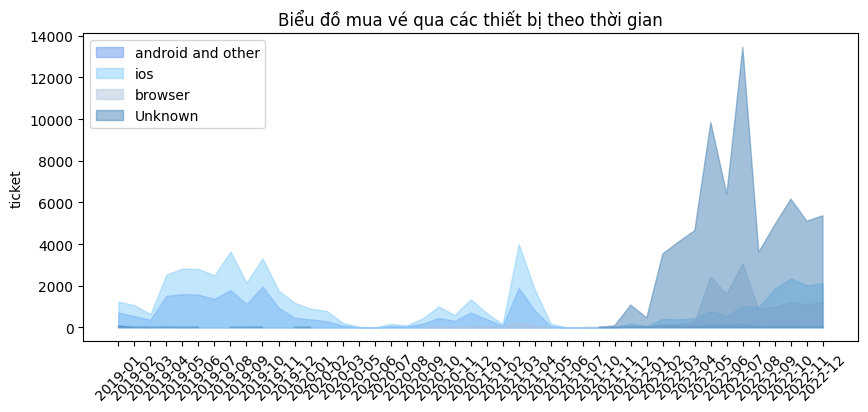

In [ ]:
plt.figure(figsize=(10, 4))

plt.fill_between(
    df_os_time["year month"],
    df_os_time["android and other"],
    color="cornflowerblue",
    alpha=0.5,
    label="android and other",
)
plt.fill_between(
    df_os_time["year month"],
    df_os_time["ios"],
    color="lightskyblue",
    alpha=0.5,
    label="ios",
)
plt.fill_between(
    df_os_time["year month"],
    df_os_time["browser"],
    color="lightsteelblue",
    alpha=0.5,
    label="browser",
)
plt.fill_between(
    df_os_time["year month"],
    df_os_time["Unknown"],
    color="steelblue",
    alpha=0.5,
    label="Unknown",
)

plt.title("Biểu đồ mua vé qua các thiết bị theo thời gian")

plt.ylabel("ticket")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

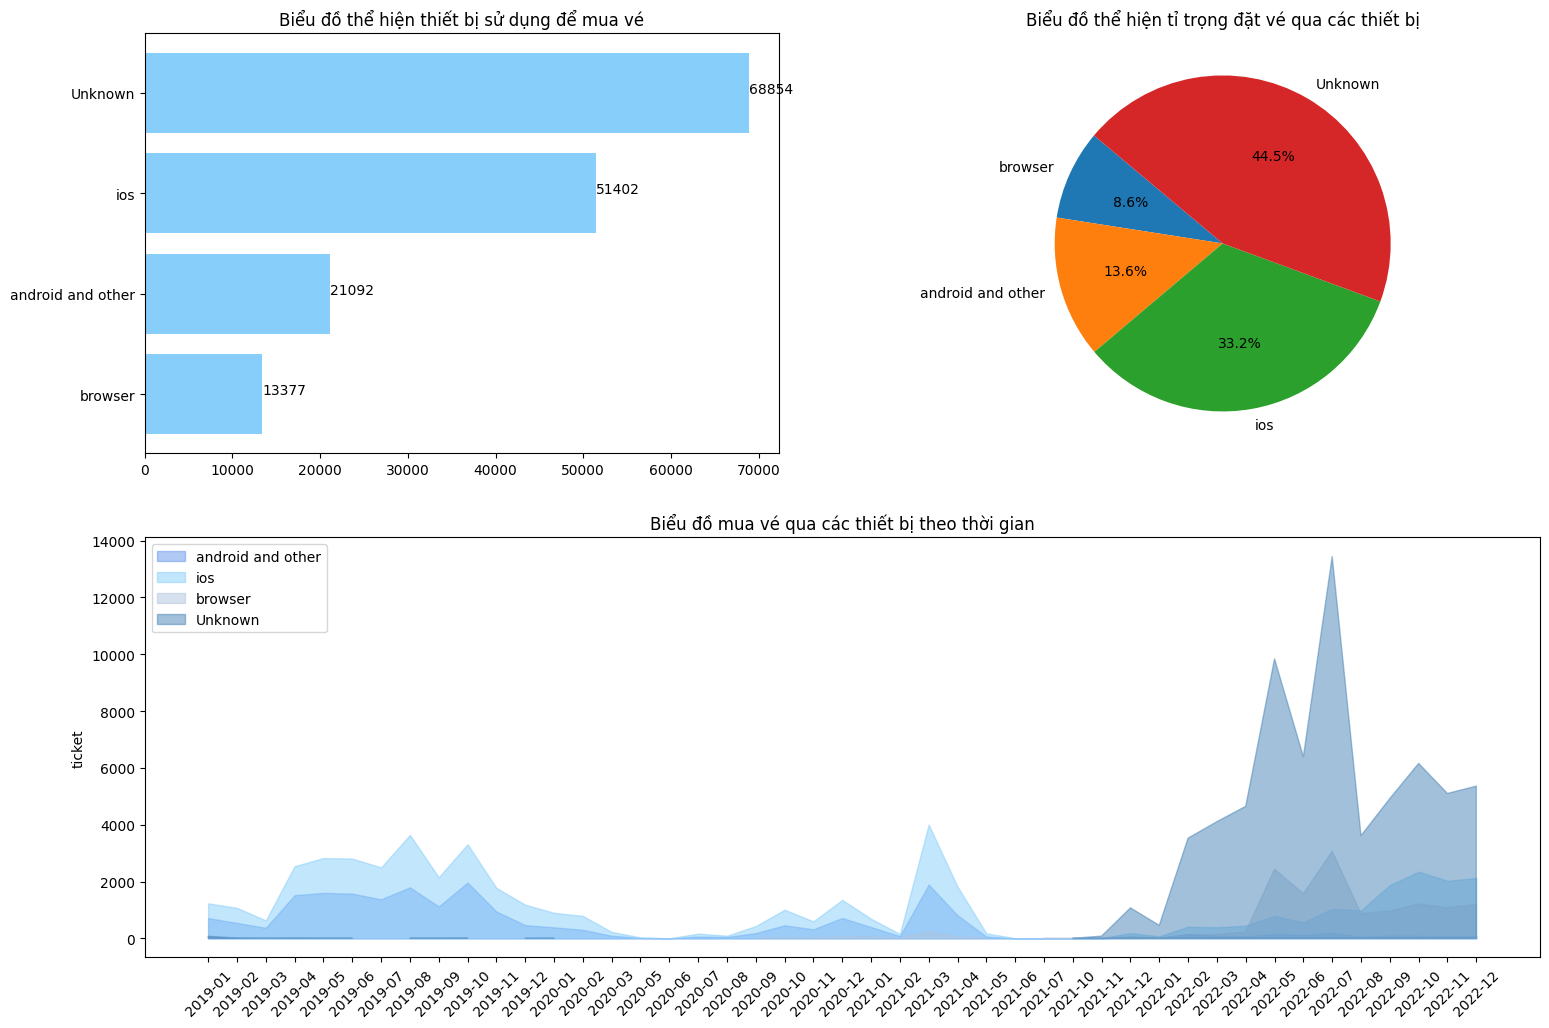

In [ ]:
# Chart 1
plt.figure(figsize=(18, 12))

ax1 = plt.subplot(2, 2, 1)
plt.barh(df_os["os_version"], df_os["total_ticket"], color="lightskyblue")
for index, value in enumerate(df_os["total_ticket"]):
    plt.text(value, index, str(value))
plt.title("Biểu đồ thể hiện thiết bị sử dụng để mua vé")

# Chart 2
ax2 = plt.subplot(2, 2, 2)
plt.pie(
    df_os["total_ticket"], labels=df_os["os_version"], autopct="%1.1f%%", startangle=140
)
plt.title("Biểu đồ thể hiện tỉ trọng đặt vé qua các thiết bị")


# Chart 3
ax3 = plt.subplot(2, 1, 2)
plt.fill_between(
    df_os_time["year month"],
    df_os_time["android and other"],
    color="cornflowerblue",
    alpha=0.5,
    label="android and other",
)
plt.fill_between(
    df_os_time["year month"],
    df_os_time["ios"],
    color="lightskyblue",
    alpha=0.5,
    label="ios",
)
plt.fill_between(
    df_os_time["year month"],
    df_os_time["browser"],
    color="lightsteelblue",
    alpha=0.5,
    label="browser",
)
plt.fill_between(
    df_os_time["year month"],
    df_os_time["Unknown"],
    color="steelblue",
    alpha=0.5,
    label="Unknown",
)
plt.title("Biểu đồ mua vé qua các thiết bị theo thời gian")
plt.ylabel("ticket")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

##### Phương thức thanh toán


In [ ]:
df_method = (
    df_join_all[
        (df_join_all["status_id"] == 1) & (df_join_all["paying_method"] != "other")
    ]
    .groupby("paying_method")
    .agg(total_ticket=("ticket_id", "count"))
    .sort_values(by="total_ticket")
    .reset_index()
)

In [ ]:
# Xử lý data dùng pivot để vẽ biểu đồ miền
df_method_time = (
    df_join_all[
        (df_join_all["status_id"] == 1) & (df_join_all["paying_method"] != "other")
    ]
    .pivot_table(
        index="year month", columns="paying_method", aggfunc="count", values="ticket_id"
    )
    .reset_index()
)
df_method_time.head()

paying_method,year month,bank account,credit card,debit card,money in app
0,2019-01,487.0,336.0,93.0,443.0
1,2019-02,484.0,370.0,93.0,480.0
2,2019-03,304.0,225.0,74.0,263.0
3,2019-04,1050.0,705.0,189.0,1246.0
4,2019-05,1092.0,903.0,212.0,1410.0


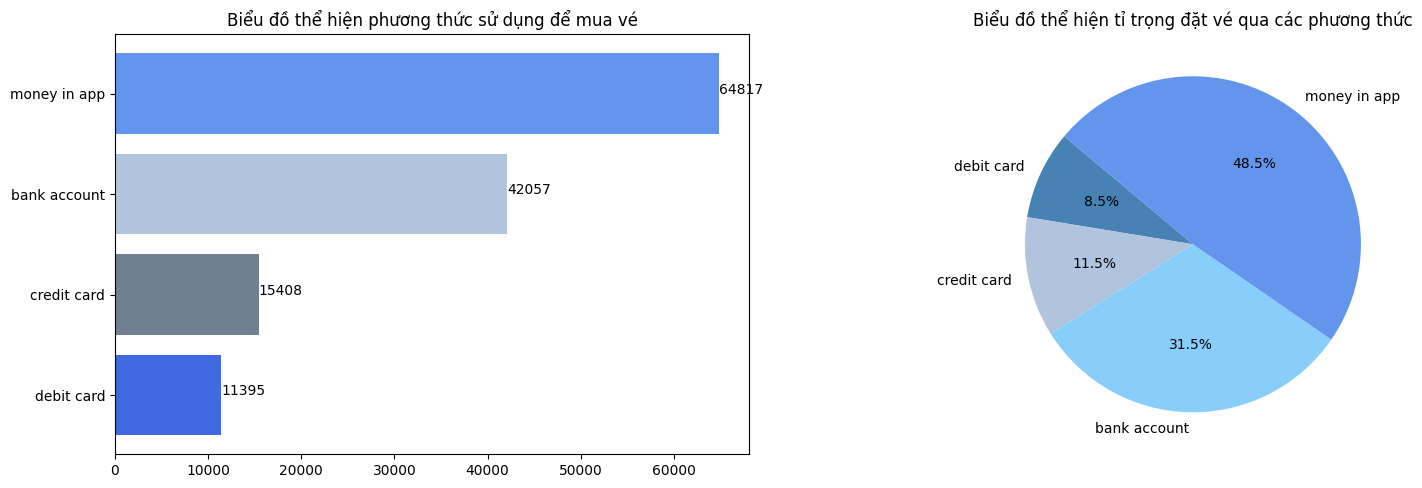

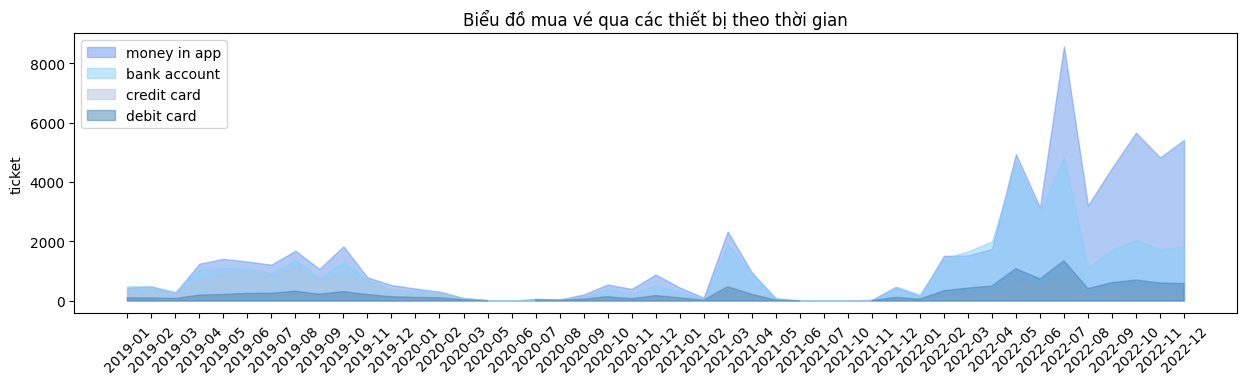

In [ ]:
# Chart 1
plt.figure(figsize=(18, 12))

ax1 = plt.subplot(2, 2, 1)
plt.barh(
    df_method["paying_method"],
    df_method["total_ticket"],
    color=["royalblue", "slategrey", "lightsteelblue", "cornflowerblue"],
)

for index, value in enumerate(df_method["total_ticket"]):
    plt.text(value, index, str(value))

plt.title("Biểu đồ thể hiện phương thức sử dụng để mua vé")

# Chart 2
ax2 = plt.subplot(2, 2, 2)
plt.pie(
    df_method["total_ticket"],
    labels=df_method["paying_method"],
    autopct="%1.1f%%",
    startangle=140,
    colors=df_method["paying_method"].replace(
        {
            "money in app": "cornflowerblue",
            "bank account": "lightskyblue",
            "credit card": "lightsteelblue",
            "debit card": "steelblue",
        }
    ),
)
plt.title("Biểu đồ thể hiện tỉ trọng đặt vé qua các phương thức")
plt.show()

# Chart 3
plt.figure(figsize=(15, 8))
ax3 = plt.subplot(2, 1, 1)
plt.fill_between(
    df_method_time["year month"],
    df_method_time["money in app"],
    color="cornflowerblue",
    alpha=0.5,
    label="money in app",
)
plt.fill_between(
    df_method_time["year month"],
    df_method_time["bank account"],
    color="lightskyblue",
    alpha=0.5,
    label="bank account",
)
plt.fill_between(
    df_method_time["year month"],
    df_method_time["credit card"],
    color="lightsteelblue",
    alpha=0.5,
    label="credit card",
)
plt.fill_between(
    df_method_time["year month"],
    df_method_time["debit card"],
    color="steelblue",
    alpha=0.5,
    label="debit card",
)
plt.title("Biểu đồ mua vé qua các thiết bị theo thời gian")
plt.ylabel("ticket")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Biểu đồ miền 100%
df_method_time = (
    df_join_all[
        (df_join_all["status_id"] == 1) & (df_join_all["paying_method"] != "other")
    ]
    .pivot_table(
        index="year month", columns="paying_method", aggfunc="count", values="ticket_id"
    )
    .reset_index()
)
df_method_time_pct = df_method_time.copy()
df_method_time_pct.head()
df_method_time_pct = df_method_time_pct.fillna(0)
df_method_time_pct["total"] = df_method_time_pct.iloc[:, 1:].sum(axis=1)
for i in df_method_time_pct.columns[1:5]:
    df_method_time_pct[i + "_pct"] = df_method_time_pct[i] / df_method_time_pct["total"]
df_method_time_pct.head()

paying_method,year month,bank account,credit card,debit card,money in app,total,bank account_pct,credit card_pct,debit card_pct,money in app_pct
0,2019-01,487.0,336.0,93.0,443.0,1359.0,0.358352,0.247241,0.068433,0.325975
1,2019-02,484.0,370.0,93.0,480.0,1427.0,0.339173,0.259285,0.065172,0.336370
2,2019-03,304.0,225.0,74.0,263.0,866.0,0.351039,0.259815,0.085450,0.303695
3,2019-04,1050.0,705.0,189.0,1246.0,3190.0,0.329154,0.221003,0.059248,0.390596
4,2019-05,1092.0,903.0,212.0,1410.0,3617.0,0.301908,0.249654,0.058612,0.389826


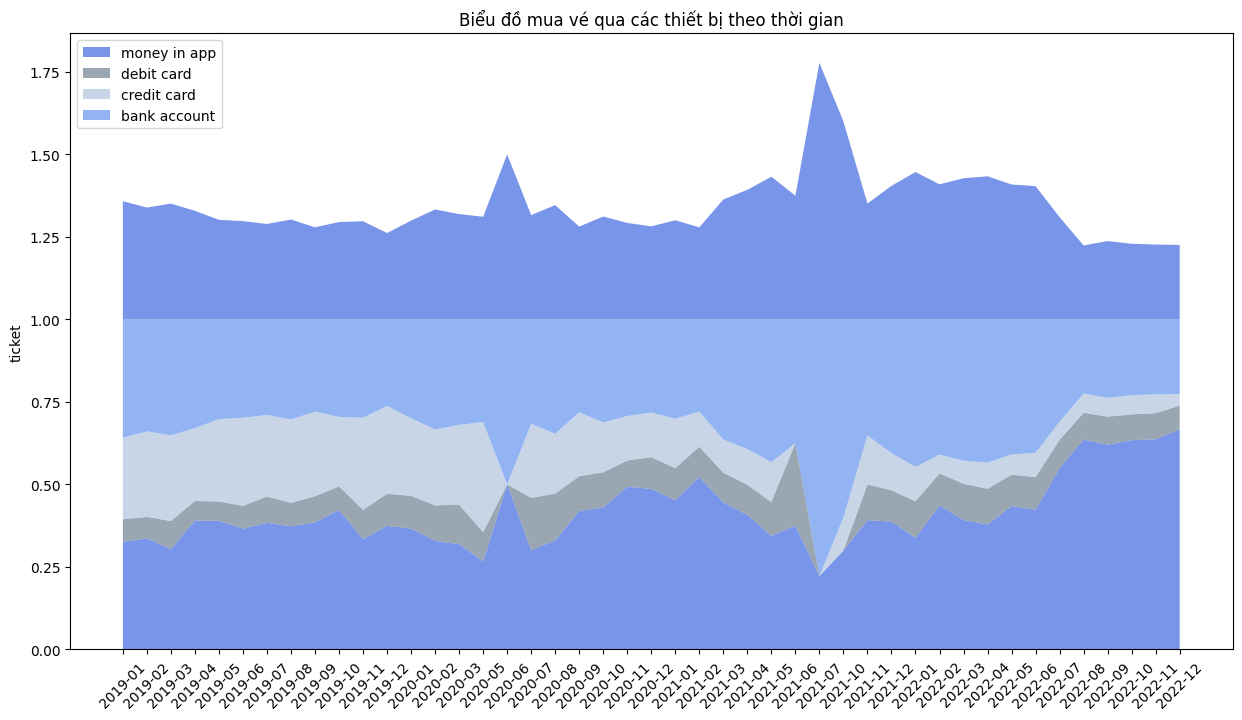

In [75]:
# Vex biều đò miền 100%
plt.figure(figsize=(15, 8))
plt.stackplot(
    df_method_time_pct["year month"],
    df_method_time_pct["money in app_pct"],
    df_method_time_pct["debit card_pct"],
    df_method_time_pct["credit card_pct"],
    df_method_time_pct["bank account_pct"],
    df_method_time_pct["bank account_pct"],
    labels=["money in app", "debit card", "credit card", "bank account"],
    colors=["royalblue", "slategrey", "lightsteelblue", "cornflowerblue"],
    alpha=0.7,
)

plt.title("Biểu đồ mua vé qua các thiết bị theo thời gian")
plt.ylabel("ticket")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

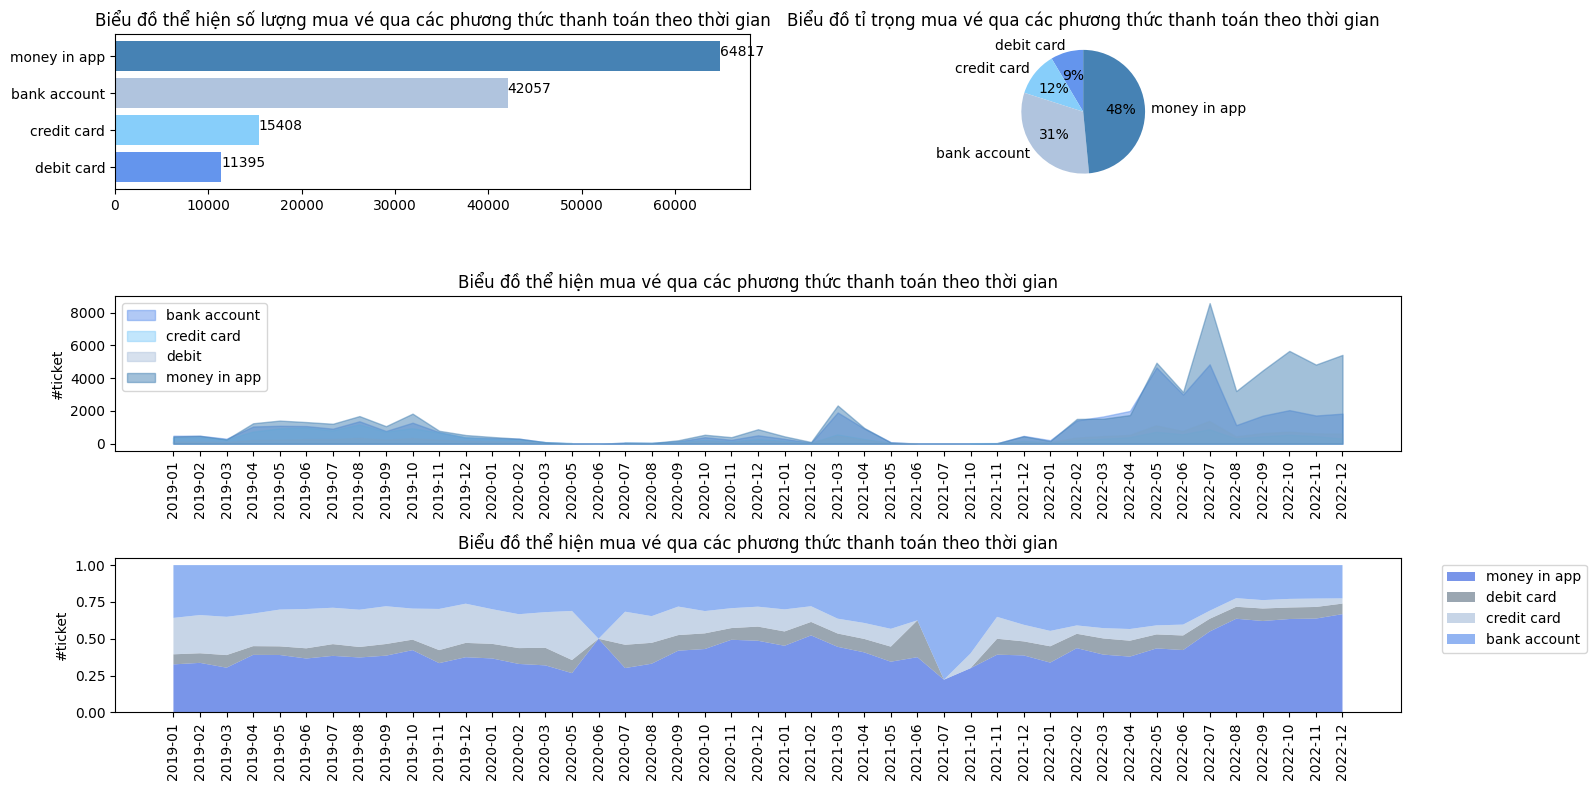

In [ ]:
# biểu diễn chung 1 frame
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(3, 2, 1)
plt.barh(
    df_method["paying_method"],
    df_method["total_ticket"],
    color=df_method["paying_method"].replace(
        {
            "bank account": "lightsteelblue",
            "credit card": "lightskyblue",
            "debit card": "cornflowerblue",
            "money in app": "steelblue",
        }
    ),
)

for index, value in enumerate(df_method["total_ticket"]):
    plt.text(value, index, str(value))
plt.title(
    "Biểu đồ thể hiện số lượng mua vé qua các phương thức thanh toán theo thời gian"
)

ax2 = plt.subplot(3, 2, 2)
plt.pie(
    df_method["total_ticket"],
    labels=df_method["paying_method"],
    colors=df_method["paying_method"].replace(
        {
            "bank account": "lightsteelblue",
            "credit card": "lightskyblue",
            "debit card": "cornflowerblue",
            "money in app": "steelblue",
        }
    ),
    autopct="%1.0f%%",
    startangle=90,
)
plt.title("Biểu đồ tỉ trọng mua vé qua các phương thức thanh toán theo thời gian")

ax3 = plt.subplot(3, 1, 2)
plt.fill_between(
    df_method_time["year month"],
    df_method_time["bank account"],
    color="cornflowerblue",
    alpha=0.5,
    label="bank account",
)
plt.fill_between(
    df_method_time["year month"],
    df_method_time["credit card"],
    color="lightskyblue",
    alpha=0.5,
    label="credit card",
)
plt.fill_between(
    df_method_time["year month"],
    df_method_time["debit card"],
    color="lightsteelblue",
    alpha=0.5,
    label="debit",
)
plt.fill_between(
    df_method_time["year month"],
    df_method_time["money in app"],
    color="steelblue",
    alpha=0.5,
    label="money in app",
)

plt.title("Biểu đồ thể hiện mua vé qua các phương thức thanh toán theo thời gian")
# plt.xlabel('Month')
plt.ylabel("#ticket")
plt.legend(loc="upper left")
plt.xticks(rotation=90)


ax4 = plt.subplot(3, 1, 3)
# vẽ biểu đồ miền 100%
plt.stackplot(
    df_method_time_pct["year month"],
    df_method_time_pct["money in app_pct"],
    df_method_time_pct["debit card_pct"],
    df_method_time_pct["credit card_pct"],
    df_method_time_pct["bank account_pct"],
    labels=["money in app", "debit card", "credit card", "bank account"],
    colors=["royalblue", "slategrey", "lightsteelblue", "cornflowerblue"],
    alpha=0.7,
)

plt.title("Biểu đồ thể hiện mua vé qua các phương thức thanh toán theo thời gian")
# plt.xlabel('Month')
plt.ylabel("#ticket")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.7, top=0.9)
plt.tight_layout()

##### Khuyến mãi


In [ ]:
df_join_all["campaign_type"].unique()

array(['direct discount', 'Unknown', 'voucher', 'reward point'],
      dtype=object)

In [ ]:
df_join_all["type"] = df_join_all["campaign_type"].apply(
    lambda x: "non-promotion" if x == "Unknown" else "promotion"
)

In [ ]:
df_type = (
    df_join_all[
        (df_join_all["status_id"] == 1) & (df_join_all["paying_method"] != "other")
    ]
    .groupby("type")
    .agg(total_ticket=("ticket_id", "count"))
    .sort_values(by="total_ticket")
    .reset_index()
)
df_type

,type,total_ticket
0,non-promotion,55155
1,promotion,78522


In [ ]:
df_type_time = (
    df_join_all[
        (df_join_all["status_id"] == 1) & (df_join_all["paying_method"] != "other")
    ]
    .pivot_table(
        index="year month", columns="type", aggfunc="count", values="ticket_id"
    )
    .reset_index()
)

df_type_time_pct = df_type_time.copy()

df_type_time_pct = df_type_time.fillna(0)
df_type_time_pct["total_ticket"] = df_type_time.iloc[:, 1:3].sum(axis=1)

for i in df_type_time_pct.columns[1:3]:
    df_type_time_pct[i + "_pct"] = (
        df_type_time_pct[i] / df_type_time_pct["total_ticket"]
    )

df_type_time_pct.head()

type,year month,non-promotion,promotion,total_ticket,non-promotion_pct,promotion_pct
0,2019-01,517.0,842.0,1359.0,0.380427,0.619573
1,2019-02,1335.0,92.0,1427.0,0.935529,0.064471
2,2019-03,835.0,31.0,866.0,0.964203,0.035797
3,2019-04,1699.0,1491.0,3190.0,0.532602,0.467398
4,2019-05,1564.0,2053.0,3617.0,0.432403,0.567597


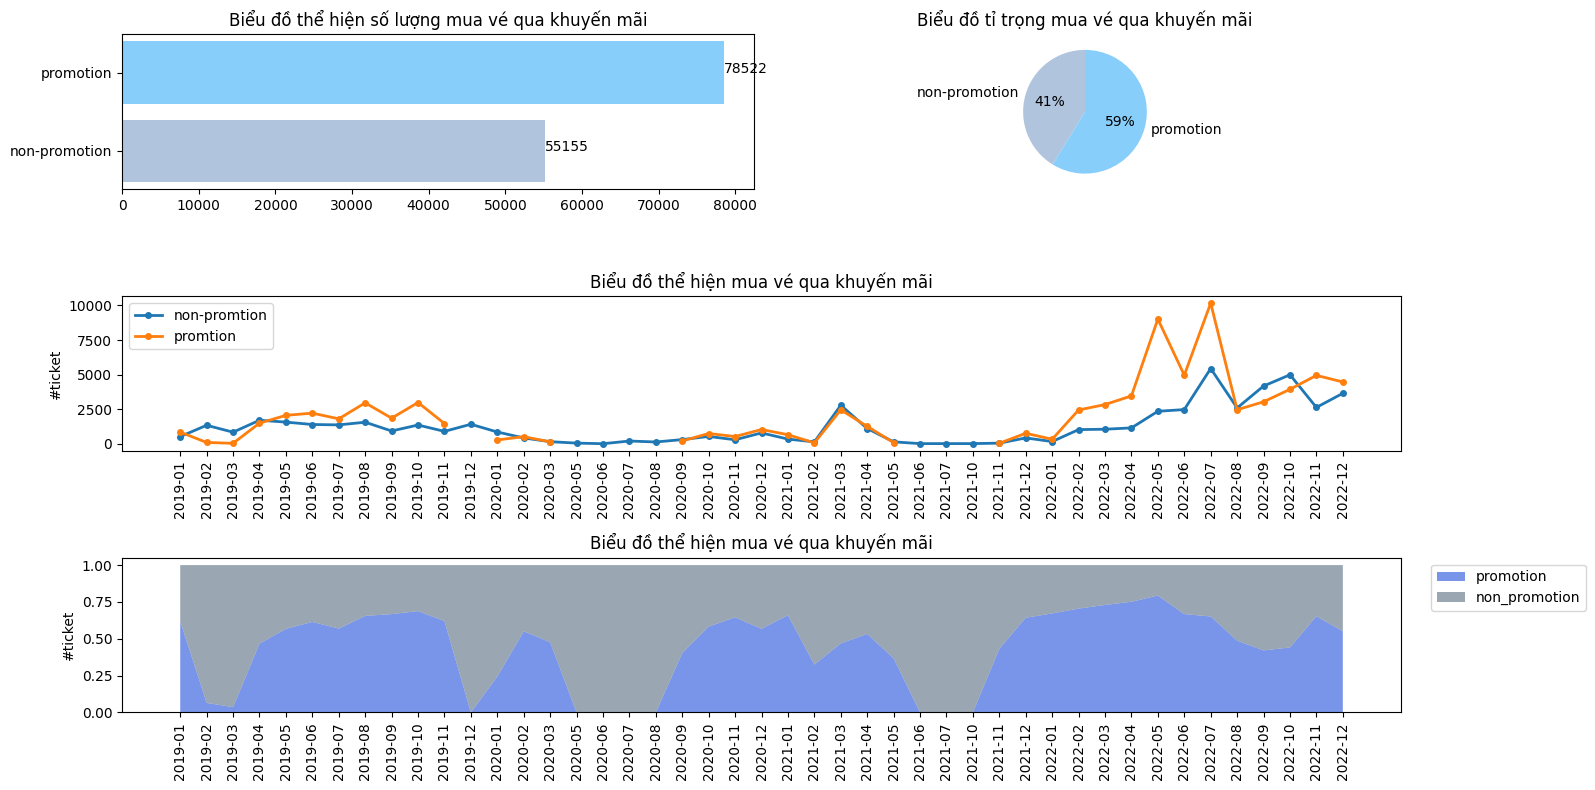

In [ ]:
# biểu diễn chung 1 frame
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(3, 2, 1)
plt.barh(
    df_type["type"],
    df_type["total_ticket"],
    color=df_type["type"].replace(
        {"non-promotion": "lightsteelblue", "promotion": "lightskyblue"}
    ),
)

for index, value in enumerate(df_type["total_ticket"]):
    plt.text(value, index, str(value))
plt.title("Biểu đồ thể hiện số lượng mua vé qua khuyến mãi")

ax2 = plt.subplot(3, 2, 2)
plt.pie(
    df_type["total_ticket"],
    labels=df_type["type"],
    colors=df_type["type"].replace(
        {"non-promotion": "lightsteelblue", "promotion": "lightskyblue"}
    ),
    autopct="%1.0f%%",
    startangle=90,
)
plt.title("Biểu đồ tỉ trọng mua vé qua khuyến mãi")

ax3 = plt.subplot(3, 1, 2)

plt.plot(
    df_type_time["year month"],
    df_type_time["non-promotion"],
    label="non-promtion",
    marker="o",
    linewidth=2,
    markersize=4,
)
plt.plot(
    df_type_time["year month"],
    df_type_time["promotion"],
    label="promtion",
    marker="o",
    linewidth=2,
    markersize=4,
)

plt.title("Biểu đồ thể hiện mua vé qua khuyến mãi")
# plt.xlabel('Month')
plt.ylabel("#ticket")
plt.legend(loc="upper left")
plt.xticks(rotation=90)


ax4 = plt.subplot(3, 1, 3)
# vẽ biểu đồ miền 100%
plt.stackplot(
    df_type_time_pct["year month"],
    df_type_time_pct["promotion_pct"],
    df_type_time_pct["non-promotion_pct"],
    labels=["promotion", "non_promotion"],
    colors=["royalblue", "slategrey"],
    alpha=0.7,
)

plt.title("Biểu đồ thể hiện mua vé qua khuyến mãi")
plt.ylabel("#ticket")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.7, top=0.9)
plt.tight_layout()

##### Loại phim


In [ ]:
df_film_sum = (
    df_join_all[df_join_all["status_id"] == 1]
    .groupby("movie_name")
    .agg(
        total_ticket=("ticket_id", "count"),
        total_customer=("customer_id", "nunique"),
        revenue=("final_price", "sum"),
    )
    .sort_values(by="total_ticket", ascending=False)
    .reset_index()
)
df_film_sum.head()

,movie_name,total_ticket,total_customer,revenue
0,Doctor Strange In The Multiverse Of Madness,8615,8409,65579.98
1,Minions: The Rise Of Gru,7224,7014,56530.93
2,Avatar: The Way Of Water,5870,5612,59830.95
3,Thor: Love And Thunder,5589,5478,43372.90
4,Peninsula,5499,5365,41208.44


In [ ]:
list_film = df_film_sum[df_film_sum["total_ticket"] > 1000]["movie_name"].unique()
list_selected_film = list(list_film)

In [ ]:
df_movie_time_pivot = (
    df_join_all[
        (df_join_all["status_id"] == 1)
        & (df_join_all["movie_name"].isin(list_selected_film))
    ]
    .pivot_table(
        index="year month", columns="movie_name", aggfunc="count", values="ticket_id"
    )
    .reset_index()
)
df_movie_time_pivot.head()

movie_name,year month,Avatar: The Way Of Water,Avengers: Endgame,Batman,Black Adam,Black Panther 2: Wakanda Forever,Blood Moon Party,Confidential Assignment 2: International,Dad I'm Sorry,Detective Conan: The Bride Of Halloween,Doctor Strange In The Multiverse Of Madness,Doraemon: Nobita's Little Star Wars 2021,Emergency Declaration,Extremely Easy Job,Face Off: 48h,Fantastic Beasts: Secrets Of Dumbledore,Fast & Furious Presents: Hobbs & Shaw,Godzilla Vs. Kong,Joker,Jurassic World Dominion,Love Destiny,Maleficent,Minions: The Rise Of Gru,Morbius,Naked Truth,One Piece Film: Red,Parasite,Peninsula,Spider-Man Far From Home,Spider-Man: No Way Home,Thor: Love And Thunder,Top Gun: Maverick,You And Trinh
0,2019-04,NaN,2081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05,NaN,1130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,28.0,NaN,NaN,NaN,NaN
3,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,NaN,1125.0,NaN,NaN,NaN,NaN
4,2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


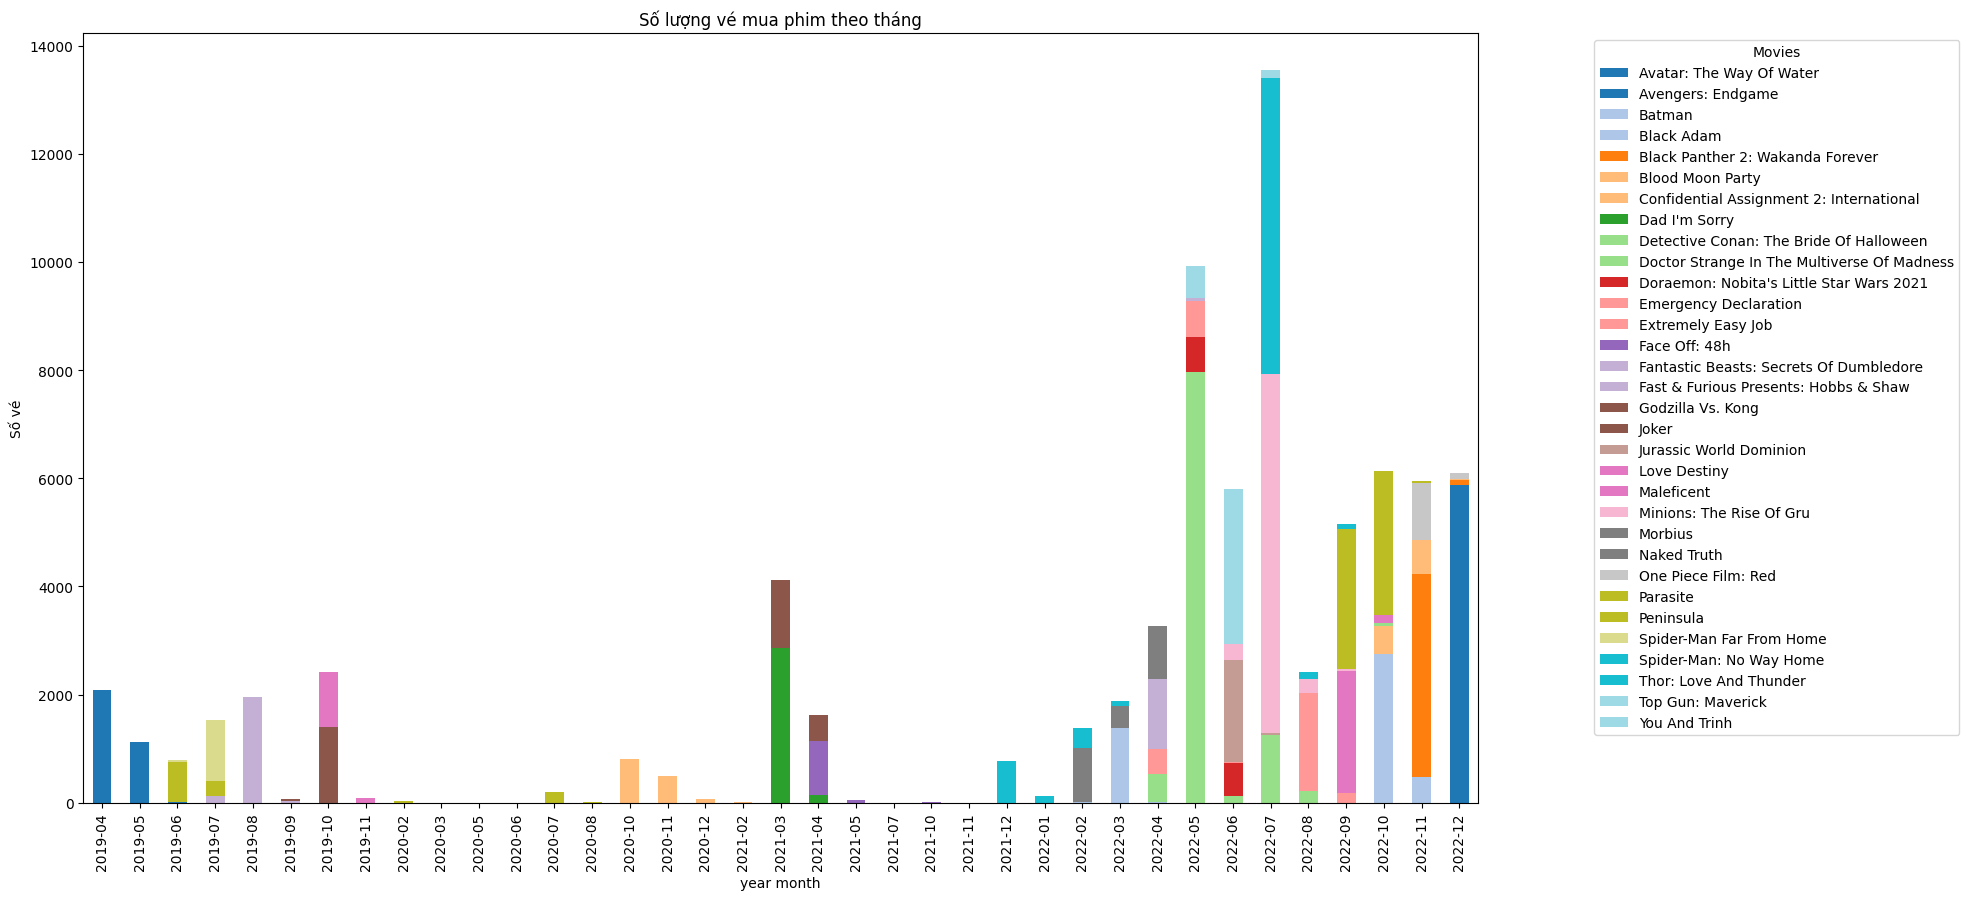

In [ ]:
# Biểu đồ bar cột chồng lên nhau
ax = df_movie_time_pivot.plot(
    x="year month", kind="bar", stacked=True, figsize=(18, 10), cmap="tab20"
)

ax.set_title("Số lượng vé mua phim theo tháng")

ax.set_ylabel("Số vé")

ax.legend(title="Movies", loc="upper right", bbox_to_anchor=(1.35, 1))

plt.show()

#### 3.4 Giá trị khách hàng

- Mục tiêu: Phân tích các chỉ số mà khách hàng mang lại
  - Frequency:count,day month
  - Monetary: total_money,total_discount
  - Success_rate = number_success/total
  - Promotion_rate = number_promotion/total_success
  - Discount_rate = sum_discount/sum_money


In [ ]:
# Tính tất cả các chỉ số trên


# Tính các chỉ số vé thanh toán thành công:
def calulate_promotion(x):
    return (x == "promotion").sum()


df_success_metric = (
    df_join_all[df_join_all["status_id"] == 1]
    .assign(date=pd.to_datetime(df_join_all["time"]).dt.date)
    .groupby("customer_id")
    .agg(
        n_success=("ticket_id", "count"),
        s_money=("original_price", "sum"),
        s_discount=("discount_value", "sum"),
        n_days=("date", "nunique"),
        n_months=("year month", "nunique"),
        n_promotions=("type", calulate_promotion),
    )
    .reset_index()
)

In [ ]:
# Tính các chỉ số total và giao dịch lỗi
def calculate_n_failed(x):
    return (x != 1).sum()


df_failed_metric = (
    df_join_all.groupby("customer_id")
    .agg(n_total=("ticket_id", "count"), n_failed=("status_id", calculate_n_failed))
    .reset_index()
)
df_failed_metric.head(2)

,customer_id,n_total,n_failed
0,100001,1,0
1,100003,6,0


In [ ]:
# join 2 bảng
df_customer_value = pd.merge(
    df_success_metric, df_failed_metric, how="left", on="customer_id"
).fillna(0)
df_customer_value.head(2)

,customer_id,n_success,s_money,s_discount,n_days,n_months,n_promotions,n_total,n_failed
0,100001,1,7.42,2.06,1,1,1,1,0
1,100003,6,60.95,2.56,6,6,1,6,0


In [ ]:
df_customer_value["success_rate"] = (
    df_customer_value["n_success"] / df_customer_value["n_total"]
)
df_customer_value["promotion_value"] = (
    df_customer_value["n_promotions"] / df_customer_value["n_success"]
)
df_customer_value["discount_value"] = (
    df_customer_value["s_discount"] / df_customer_value["s_money"]
)
df_customer_value.head()

,customer_id,n_success,s_money,s_discount,n_days,n_months,n_promotions,n_total,n_failed,success_rate,promotion_value,discount_value
0,100001,1,7.42,2.06,1,1,1,1,0,1.0,1.000000,0.277628
1,100003,6,60.95,2.56,6,6,1,6,0,1.0,0.166667,0.042002
2,100004,1,32.25,0.00,1,1,0,1,0,1.0,0.000000,0.000000
3,100005,1,9.49,2.06,1,1,1,1,0,1.0,1.000000,0.217071
4,100006,1,12.37,0.00,1,1,0,1,0,1.0,0.000000,0.000000


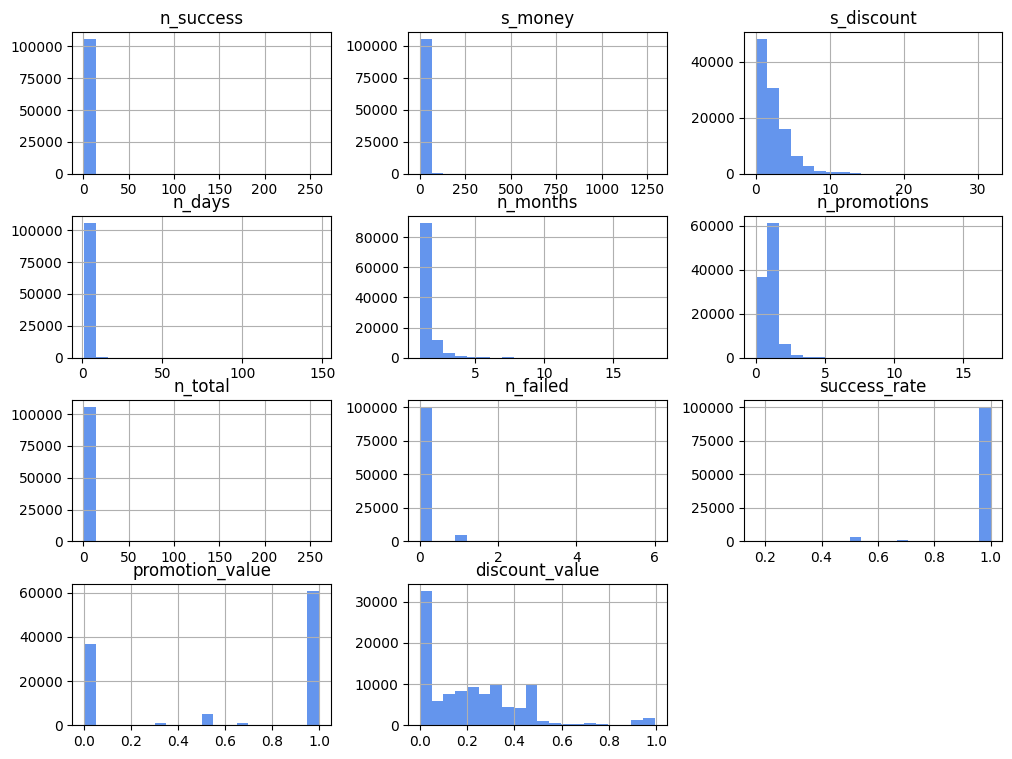

In [ ]:
df_customer_value.iloc[:, 1:].hist(figsize=(12, 9), color="cornflowerblue", bins=20)
plt.show()

##### Note:

- total:Hầu hết khách hàng mua vé rất ít nhưng có những người mua rất nhiều vé rất cao check những người này
- success_rate: có khoảng 10% giao dịch =0
- promotion_Rate: có hơn 60000 kh chỉ tham gia promotion khi rate lên 100%
- n_promotion: 60000 kh chỉ hưởng promotion 1 lần (có liên quan gì đến promotion_rate=100%)


##### Phân tích hành vi bất thường của khách hàng


In [ ]:
df_customer_value["n_order_dis"] = df_customer_value["n_success"].apply(
    lambda x: "more than 10" if x >= 10 else str(x)
)
df_customer_value[df_customer_value["n_success"] == "0.0"]

,customer_id,n_success,s_money,s_discount,n_days,n_months,n_promotions,n_total,n_failed,success_rate,promotion_value,discount_value,n_order_dis


In [ ]:
df_n_dis = (
    df_customer_value.groupby("n_order_dis")
    .agg(total_cus=("customer_id", "count"))
    .reset_index()
)
df_n_dis.head(12)

,n_order_dis,total_cus
0,1,87921
1,2,12902
2,3,3145
3,4,1017
4,5,380
5,6,168
6,7,92
7,8,47
8,9,30
9,more than 10,74


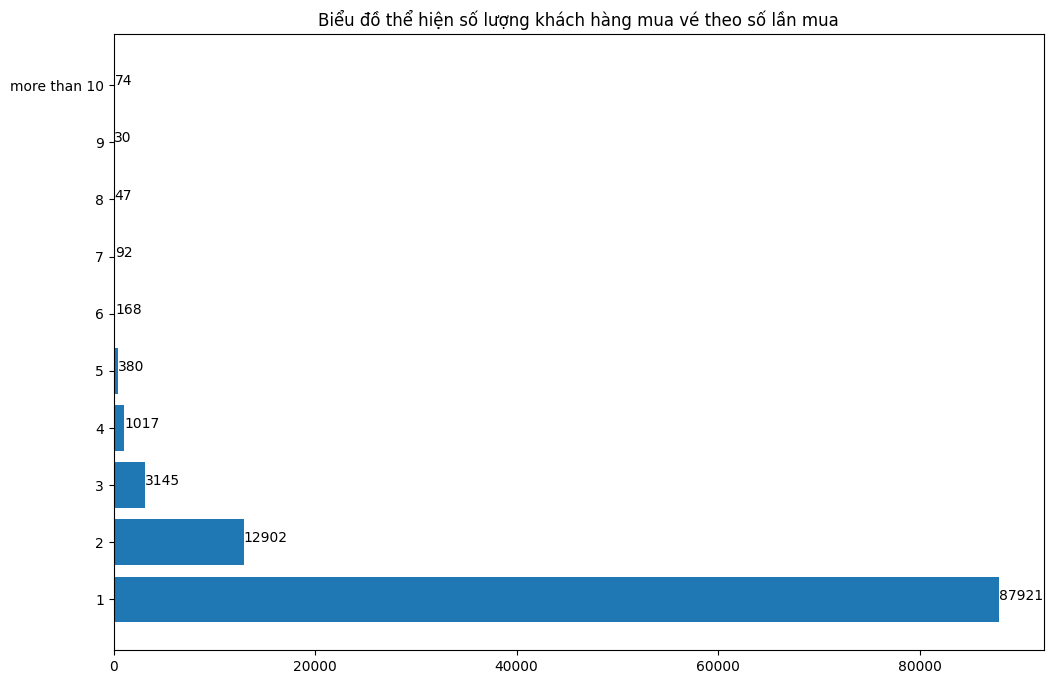

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(df_n_dis["n_order_dis"], df_n_dis["total_cus"])
plt.title("Biểu đồ thể hiện số lượng khách hàng mua vé theo số lần mua")

for index, value in enumerate(df_n_dis["total_cus"]):
    plt.text(value, index, str(value))

plt.show()

In [ ]:
# Nếu họ mua dồn vào 1 lúc -> bất thường
# Nếu mua dàn trải  -> bình thường
list_customer_massive = list(
    df_customer_value[df_customer_value["n_success"] > 30]["customer_id"].unique()
)
df_customer_massive_pivot = (
    df_join_all[
        (df_join_all["customer_id"].isin(list_customer_massive))
        & (df_join_all["status_id"] == 1)
    ].pivot_table(
        index="year month", columns="customer_id", aggfunc="count", values="ticket_id"
    )
).reset_index()

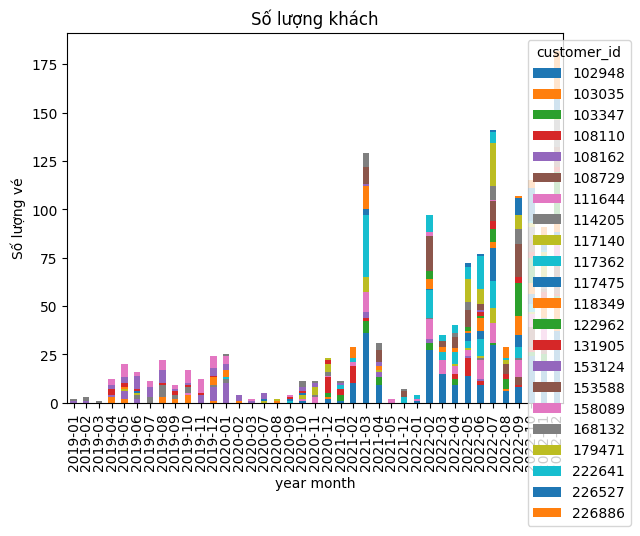

In [ ]:
ax = df_customer_massive_pivot.plot(x="year month", kind="bar", stacked=True)

ax.set_title("Số lượng khách")

ax.set_ylabel("Số lượng vé")

plt.legend(title="customer_id", loc="upper right", bbox_to_anchor=(1.15, 1))

> **Note:**
>
> > - Nhóm khách hàng mua số lượng >30 vé không có hiện tượng spam vé mua đi bán lại
> > - Chưa có gì bất thường


##### Massive promotion


In [ ]:
df_customer_value["n_promo_dis"] = df_customer_value["n_promotions"].apply(
    lambda x: "more than 10" if x >= 10 else str(x)
)

In [ ]:
df_promo_dis = (
    df_customer_value.groupby("n_promo_dis")
    .agg(total_cus=("customer_id", "count"))
    .reset_index()
)

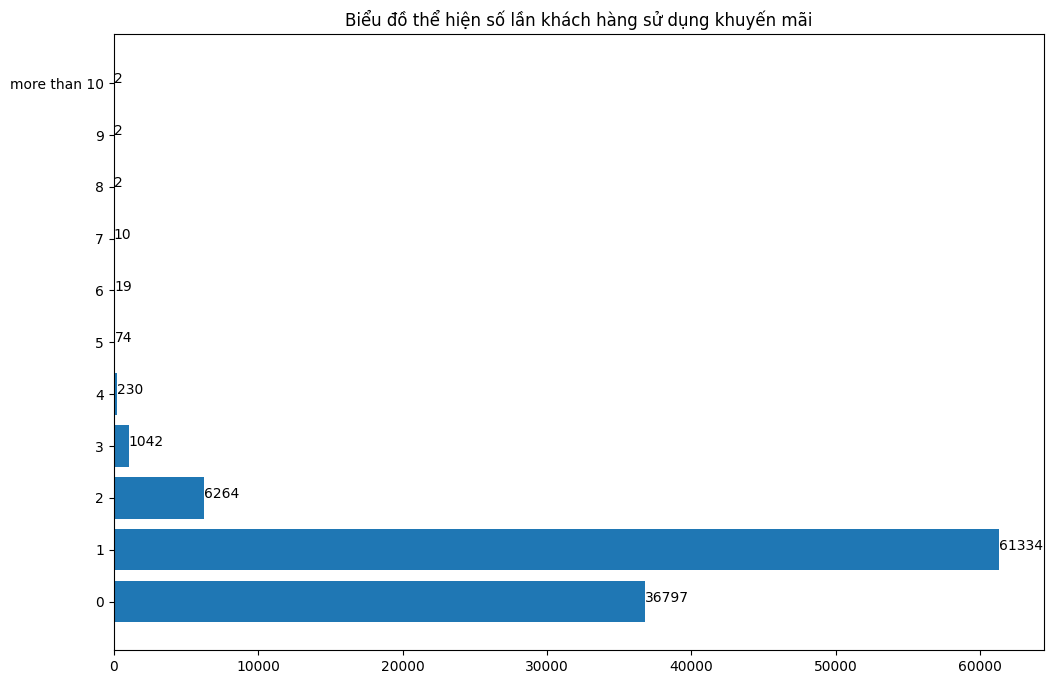

In [ ]:
plt.figure(figsize=(12, 8))
plt.barh(df_promo_dis["n_promo_dis"], df_promo_dis["total_cus"])
plt.title("Biểu đồ thể hiện số lần khách hàng sử dụng khuyến mãi")

for index, value in enumerate(df_promo_dis["total_cus"]):
    plt.text(value, index, str(value))

> > - 60% khách hàng tham gia chương trình khuyến mãi
> > - Trong đó 90% chỉ hưởng khuyễn mãi 1 lần duy nhất
> >   > - 1. Khách hàng đến 1 lần rồi thôi
> >   > - 2. Các chương trình promotion chỉ cho 1 người dùng lần (dành cho customer)??? -> làm rõ với team product or MKT


In [99]:
### Vậy loại khuyến mãi khách hàng đang dùng là gì
df_type_group = (
    df_join_all[(df_join_all["status_id"] == 1) & (df_join_all["type"] == "promotion")]
    .groupby("campaign_type")
    .agg(total=("ticket_id", "count"))
    .reset_index()
)
df_type_group

,campaign_type,total
0,direct discount,68449
1,reward point,3150
2,voucher,6924


In [ ]:
## Tính tỷ lệ loại khách hàng chi tiết cho từng nhóm KH(nhóm 1 KH,2 KH,...)
df_n_success = (
    df_join_all[(df_join_all["status_id"] == 1) & (df_join_all["type"] == "promotion")]
    .groupby("customer_id")
    .agg(n_promotions=("ticket_id", "count"))
)
df_n_success.head()

,n_promotions
customer_id,
100001,1
100003,1
100005,1
100007,1
100009,7


In [ ]:
df_n_pivot = (
    df_join_all[(df_join_all["status_id"] == 1) & (df_join_all["type"] == "promotion")]
    .pivot_table(
        index="customer_id",
        columns="campaign_type",
        aggfunc="count",
        values="ticket_id",
    )
    .reset_index()
)
df_n_pivot.head()

campaign_type,customer_id,direct discount,reward point,voucher
0,100001,NaN,NaN,1.0
1,100003,1.0,NaN,NaN
2,100005,NaN,NaN,1.0
3,100007,1.0,NaN,NaN
4,100009,7.0,NaN,NaN


In [ ]:
df_n_join = (
    pd.merge(df_n_success, df_n_pivot, how="inner", on="customer_id")
    .groupby("n_promotions")
    .agg(
        n_cus=("customer_id", "count"),
        n_voucher=("voucher", "sum"),
        n_discount=("direct discount", "sum"),
        n_rewward_point=("reward point", "sum"),
    )
    .reset_index()
)
df_n_join.head()

,n_promotions,n_cus,n_voucher,n_discount,n_rewward_point
0,1,61334,5358.0,53098.0,2878.0
1,2,6264,1091.0,11222.0,215.0
2,3,1042,293.0,2788.0,45.0
3,4,230,87.0,827.0,6.0
4,5,74,43.0,323.0,4.0


In [ ]:
df_n_join["total"] = df_n_join.iloc[:, 2:].sum(axis=1)

In [ ]:
for i in df_n_join.columns[2:5]:
    df_n_join[i + "_pct"] = df_n_join[i] / df_n_join["total"]

In [105]:
df_n_join.head()

,n_promotions,n_cus,n_voucher,n_discount,n_rewward_point,total,n_voucher_pct,n_discount_pct,n_rewward_point_pct
0,1,61334,5358.0,53098.0,2878.0,61334.0,0.087358,0.865719,0.046923
1,2,6264,1091.0,11222.0,215.0,12528.0,0.087085,0.895754,0.017162
2,3,1042,293.0,2788.0,45.0,3126.0,0.093730,0.891875,0.014395
3,4,230,87.0,827.0,6.0,920.0,0.094565,0.898913,0.006522
4,5,74,43.0,323.0,4.0,370.0,0.116216,0.872973,0.010811


In [ ]:
format_dict = {
    "total": "{:.0f}",
    "n_voucher_pct": "{:.0%}",
    "n_discount_pct": "{:.0%}",
    "n_rewward_point_pct": "{:.0%}",
}

In [ ]:
# tô màu (heat map) cho table
(
    df_n_join.drop(columns=["n_voucher", "n_discount", "n_rewward_point"])
    .style.format(format_dict)
    .background_gradient(
        subset=["n_voucher_pct", "n_discount_pct", "n_rewward_point_pct"],
        cmap="coolwarm",
    )
    .background_gradient(
        subset=["total"],
        cmap="YlGn",
    )
)

,n_promotions,n_cus,total,n_voucher_pct,n_discount_pct,n_rewward_point_pct
0,1,61334,61334,9%,87%,5%
1,2,6264,12528,9%,90%,2%
2,3,1042,3126,9%,89%,1%
3,4,230,920,9%,90%,1%
4,5,74,370,12%,87%,1%
5,6,19,114,11%,89%,0%
6,7,10,70,20%,77%,3%
7,8,2,16,12%,88%,0%
8,9,2,18,33%,67%,0%
9,10,1,10,10%,90%,0%


> ** Notes **
>
> > - ~ 90% Khách hàng sử dụng các campaign direct discount
> > - Đánh giá thêm về retention của khách hàng -> Quay trở lại? - > Hiệu quả mkt


#### 3.5 Customer retentation - Cohort Analysis


- Dựa vào thời điểm chuyển đổi khách hàng: lần đầu thanh toán,mua hàng,cài app


##### 2019


In [108]:
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

In [ ]:
# Tính toán các thông tin: cohort (first_month), current_month, subsequent month
df_selected_time = df_join_all[
    (df_join_all["time"] < "2020-01-01") & (df_join_all["status_id"] == 1)
]
df_selected_time["first_month"] = (
    df_selected_time.groupby("customer_id")["time"].transform("min").dt.to_period("M")
)
df_selected_time["current_month"] = df_selected_time["time"].dt.to_period("M")
df_selected_time["subsequent_month"] = (
    df_selected_time["current_month"] - df_selected_time["first_month"]
).apply(attrgetter("n"))

C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\1426172196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\1426172196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\1426172196.py:5: SettingWithCopyWarning: 
A

In [110]:
df_selected_time.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age,month,name day,hour,year month,os_version,type,first_month,current_month,subsequent_month
11327,9e3e753f70aede1c6dcc577ce563eef1,100009,credit card,74.0,3cac5d2e2eb76525aecea5c2ab46b3d9,9.07,2.56,6.51,2019-11-09 16:19:41.008,1,25680,Doctor Sleep,Male,1989-02-25,direct discount,Order successful,Unknown,"iPhone10,2",mobile,36,11,Saturday,16,2019-11,ios,promotion,2019-04,2019-11,7
11328,74a0ac9b7c60d2e7d3664686c3342c00,101892,money in app,79.0,fe9a5c91e224f005a8be1c62923548d8,9.07,2.56,6.51,2019-11-16 16:35:02.953,1,25690,Doctor Sleep,Female,1986-10-19,direct discount,Order successful,Unknown,Samsung SM-N935F,mobile,38,11,Saturday,16,2019-11,android and other,promotion,2019-08,2019-11,3


In [ ]:
# bước 2: Group by cohort
df_cohor = (
    df_selected_time.groupby(["first_month", "current_month", "subsequent_month"])
    .agg(n_customers=("customer_id", "nunique"))
    .reset_index(drop=False)
)

In [112]:
df_cohor.head(5)

,first_month,current_month,subsequent_month,n_customers
0,2019-01,2019-01,0,1348
1,2019-01,2019-02,1,50
2,2019-01,2019-03,2,35
3,2019-01,2019-04,3,26
4,2019-01,2019-05,4,25


In [ ]:
# Pivot table
df_cohort_pivot = df_cohor.pivot_table(
    index="first_month", columns="subsequent_month", values="n_customers"
)

In [114]:
df_cohort_pivot.head()

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1348.0,50.0,35.0,26.0,25.0,33.0,36.0,29.0,18.0,35.0,21.0,20.0
2019-02,1293.0,58.0,88.0,64.0,78.0,50.0,58.0,30.0,46.0,29.0,35.0,NaN
2019-03,745.0,51.0,48.0,49.0,33.0,33.0,30.0,34.0,23.0,14.0,NaN,NaN
2019-04,2922.0,101.0,103.0,87.0,92.0,66.0,96.0,63.0,42.0,NaN,NaN,NaN
2019-05,3226.0,145.0,118.0,129.0,90.0,93.0,90.0,62.0,NaN,NaN,NaN,NaN


In [ ]:
# chuyển sang %
cohort_size = df_cohort_pivot.iloc[:, 0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis=0)

In [116]:
cohort_size.head()

first_month
2019-01    1348.0
2019-02    1293.0
2019-03     745.0
2019-04    2922.0
2019-05    3226.0
Freq: M, Name: 0, dtype: float64

In [117]:
retention_matrix

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1.0,0.037092,0.025964,0.019288,0.018546,0.024481,0.026706,0.021513,0.013353,0.025964,0.015579,0.014837
2019-02,1.0,0.044857,0.068059,0.049497,0.060325,0.038670,0.044857,0.023202,0.035576,0.022428,0.027069,NaN
2019-03,1.0,0.068456,0.064430,0.065772,0.044295,0.044295,0.040268,0.045638,0.030872,0.018792,NaN,NaN
2019-04,1.0,0.034565,0.035250,0.029774,0.031485,0.022587,0.032854,0.021561,0.014374,NaN,NaN,NaN
2019-05,1.0,0.044947,0.036578,0.039988,0.027898,0.028828,0.027898,0.019219,NaN,NaN,NaN,NaN
2019-06,1.0,0.042782,0.049314,0.032005,0.043436,0.037231,0.020575,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.046342,0.030257,0.037917,0.029874,0.015320,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.029987,0.041499,0.028380,0.017135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.053942,0.030890,0.017981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


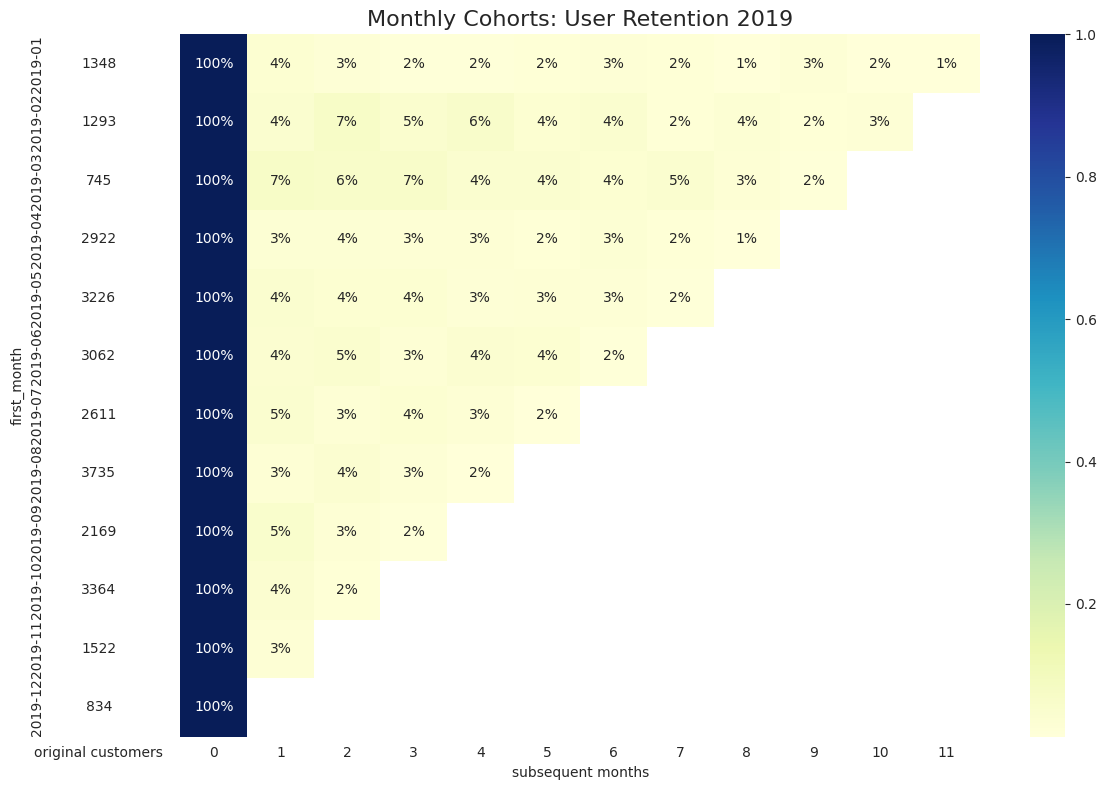

In [ ]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(
        1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
    )

    # retention matrix
    sns.heatmap(
        retention_matrix,
        mask=retention_matrix.isnull(),
        annot=True,
        fmt=".0%",
        cmap="YlGnBu",
        ax=ax[1],
    )
    ax[1].set_title("Monthly Cohorts: User Retention 2019", fontsize=16)
    ax[1].set(xlabel="subsequent months", ylabel="")

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "original customers"})
    white_cmap = mcolors.ListedColormap(["white"])
    sns.heatmap(
        cohort_size_df,
        annot=True,
        cbar=False,
        fmt="g",
        cmap=white_cmap,
        alpha=0.5,
        ax=ax[0],
    )

    fig.tight_layout()

##### 2022


In [ ]:
df_selected_time = df_join_all[
    (df_join_all["time"] < "2020-01-01") & (df_join_all["status_id"] == 1)
]
df_selected_time["first_month"] = (
    df_selected_time.groupby("customer_id")["time"].transform("min").dt.to_period("M")
)
df_selected_time["current_month"] = df_selected_time["time"].dt.to_period("M")
df_selected_time["subsequent_month"] = (
    df_selected_time["current_month"] - df_selected_time["first_month"]
).apply(attrgetter("n"))

C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\762007375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\762007375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\762007375.py:4: SettingWithCopyWarning: 
A va

In [ ]:
# bước 2: Group by cohort
df_cohor = (
    df_selected_time.groupby(["first_month", "current_month", "subsequent_month"])
    .agg(n_customers=("customer_id", "nunique"))
    .reset_index(drop=False)
)

In [ ]:
# Pivot table
df_cohort_pivot = df_cohor.pivot_table(
    index="first_month", columns="subsequent_month", values="n_customers"
)

In [ ]:
# chuyển sang %
cohort_size = df_cohort_pivot.iloc[:, 0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis=0)

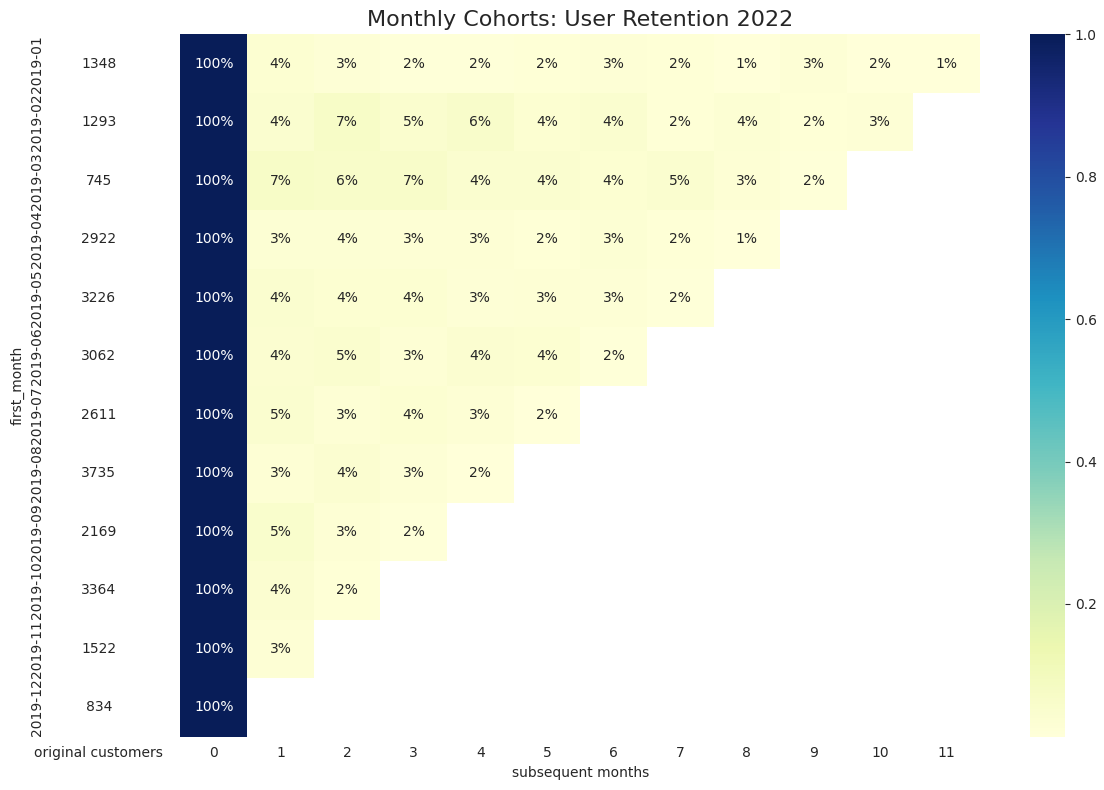

In [ ]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(
        1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
    )

    # retention matrix
    sns.heatmap(
        retention_matrix,
        mask=retention_matrix.isnull(),
        annot=True,
        fmt=".0%",
        cmap="YlGnBu",
        ax=ax[1],
    )
    ax[1].set_title("Monthly Cohorts: User Retention 2022", fontsize=16)
    ax[1].set(xlabel="subsequent months", ylabel="")

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: "original customers"})
    white_cmap = mcolors.ListedColormap(["white"])
    sns.heatmap(
        cohort_size_df,
        annot=True,
        cbar=False,
        fmt="g",
        cmap=white_cmap,
        alpha=0.5,
        ax=ax[0],
    )

    fig.tight_layout()

##### Note

- Retention 2019 và 2022 không có gì khác biệt
- Mặc dù tỉ lệ promotion 60-65 % vẫn cao


##### Compare: Retention of promotion customers & organic customers


In [ ]:
# By payment method
df_pie_promo = (
    df_join_all[(df_join_all["status_id"] == 1) & (df_join_all["time"] > "2022-01-01")]
    .groupby("type")
    .agg(total_ticket=("customer_id", "nunique"))
    .sort_values(by="total_ticket", ascending=True)
    .reset_index()
)

In [125]:
df_pie_promo

,type,total_ticket
0,non-promotion,27672
1,promotion,47507


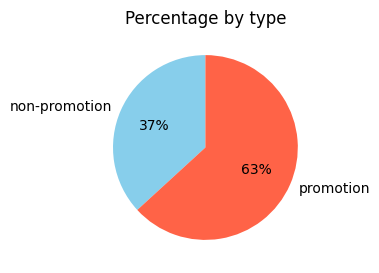

In [ ]:
# pie
plt.figure(figsize=(6, 3))
plt.pie(
    df_pie_promo["total_ticket"],
    labels=df_pie_promo["type"],
    autopct="%1.0f%%",
    colors=df_pie_promo["type"].replace(
        {"promotion": "tomato", "non-promotion": "skyblue"}
    ),
    startangle=90,
)

plt.title("Percentage by type")
plt.show()

In [ ]:
# Phân biệt nhóm đền từ promotion và nhóm organic: dựa vào vé đầu tiên (first order)
# Đánh số thứ tự các ticket của khách hàng

df_data_check = df_join_all[
    (df_join_all["status_id"] == 1) & (df_join_all["time"] > "2022-01-01")
][["customer_id", "ticket_id", "time", "type"]].sort_values(by=["customer_id", "time"])

In [128]:
df_data_check.head(10)

,customer_id,ticket_id,time,type
66484,100003,34c4764b4afa000af4c33a525f20eace,2022-05-22 12:52:12.105,non-promotion
10001,100004,1c4aa39842bfc83dbb5856c25a33d9cb,2022-12-20 06:26:21.373,non-promotion
108794,100007,5565ba5e22475c7cce298a2bea470428,2022-03-21 17:57:18.460,promotion
0,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion
5585,100009,0724203b5146b0ebae6e3678ed7eccde,2022-12-24 09:32:45.477,promotion
69405,100013,f95441286dcfa045f61a5760662616e1,2022-05-05 12:22:44.587,non-promotion
140483,100018,1e40fb2d0f6264ed3127f79b1a12c9c9,2022-09-07 21:13:17.896,non-promotion
90595,100018,9a959ff1649950949ff2c0aff4b62205,2022-11-19 16:25:43.981,promotion
35270,100020,af02fc96a6703af7d93162d9f8c61dba,2022-05-28 19:09:37.936,promotion
16649,100023,5ed44ff62214268ffcb14d4ea78b04d8,2022-05-16 08:45:42.397,promotion


In [ ]:
df_data_check["row_number"] = df_data_check.groupby("customer_id").cumcount() + 1

In [130]:
df_data_check.head(10)

,customer_id,ticket_id,time,type,row_number
66484,100003,34c4764b4afa000af4c33a525f20eace,2022-05-22 12:52:12.105,non-promotion,1
10001,100004,1c4aa39842bfc83dbb5856c25a33d9cb,2022-12-20 06:26:21.373,non-promotion,1
108794,100007,5565ba5e22475c7cce298a2bea470428,2022-03-21 17:57:18.460,promotion,1
0,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion,1
5585,100009,0724203b5146b0ebae6e3678ed7eccde,2022-12-24 09:32:45.477,promotion,2
69405,100013,f95441286dcfa045f61a5760662616e1,2022-05-05 12:22:44.587,non-promotion,1
140483,100018,1e40fb2d0f6264ed3127f79b1a12c9c9,2022-09-07 21:13:17.896,non-promotion,1
90595,100018,9a959ff1649950949ff2c0aff4b62205,2022-11-19 16:25:43.981,promotion,2
35270,100020,af02fc96a6703af7d93162d9f8c61dba,2022-05-28 19:09:37.936,promotion,1
16649,100023,5ed44ff62214268ffcb14d4ea78b04d8,2022-05-16 08:45:42.397,promotion,1


In [ ]:
# Số KH có first payment là promotion:
df_data_check[
    (df_data_check["type"] == "promotion") & (df_data_check["row_number"] == 1)
]["customer_id"].nunique()

46189

In [ ]:
46189 / 47507

0.9722567200623066

In [133]:
# Có 97% KH đến từ promotion trong nhóm KH có tham gia promotion --> Retention là bao nhiêu

In [ ]:
df_first_promo_list = df_data_check[
    (df_data_check["type"] == "promotion") & (df_data_check["row_number"] == 1)
]["customer_id"]
df_first_promo_list.drop_duplicates(inplace=True)
df_first_promo_check = pd.merge(
    df_data_check, df_first_promo_list, how="inner", on="customer_id"
)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\3497675835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_promo_list.drop_duplicates(inplace=True)


In [ ]:
(
    df_first_promo_check[(df_first_promo_check["row_number"] == 2)][
        "customer_id"
    ].nunique()
    / df_first_promo_check["customer_id"].nunique()
)

0.1308969668102795

In [136]:
# 13% KH quay lại kể từ lần đầu tham gia promotion ( tỷ lệ chuyển đổi , giữ chân = 13%)
# Nhóm organic có khác biệt không

In [ ]:
list_first_non_promo = df_data_check[
    (df_data_check["type"] == "non-promotion") & (df_data_check["row_number"] == 1)
]["customer_id"]

list_first_non_promo.drop_duplicates(inplace=True)

df_first_non_promo_check = pd.merge(
    df_data_check, list_first_non_promo, how="inner", on="customer_id"
)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15648\1418859183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_first_non_promo.drop_duplicates (inplace=True)


In [ ]:
(
    df_first_non_promo_check[(df_first_non_promo_check["row_number"] == 2)][
        "customer_id"
    ].nunique()
    / df_first_non_promo_check["customer_id"].nunique()
)

0.12195316551641601

In [139]:
# Nhóm khách hàng first time tỉ lệ quay lại là 12%

> **Note:**
>
> - **97%** promotion 2022 là dành cho new customer tuy nhiên
> - Chỉ có **13** quay trở lại lần lần sau, trong khi tỷ lệ này của nhóm organic là **12%**
>   -> Công ty đang chú trọng acquire new customers nhưng chưa đẩy mạnh việc giữ chân và duy trì lượng KH cũ.


#### 3.6 Payment success rate


##### Overview


In [ ]:
def calculate_n_success(x):
    return (x == 1).sum()


df_sr = (
    df_join_all.groupby("year month")
    .agg(
        n_ords=("ticket_id", "count"),  # total ticket
        n_success=("status_id", calculate_n_success),
    )  # success ticket
    .assign(
        success_rate=lambda x: (x["n_success"] / x["n_ords"]) * 100
    )  # tạo thêm 1 column tính SR
    .reset_index()
)

In [144]:
df_sr.head()

,year month,n_ords,n_success,success_rate
0,2019-01,2019,1359,67.310550
1,2019-02,1626,1427,87.761378
2,2019-03,1004,866,86.254980
3,2019-04,4069,3190,78.397641
4,2019-05,4430,3617,81.647856


Text(0.5, 1.0, 'Payment success rate by months')

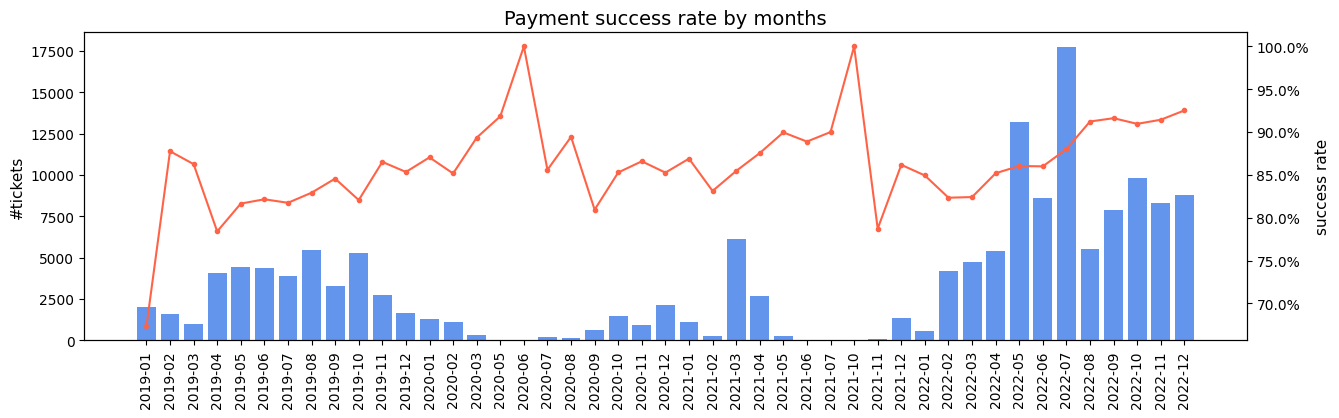

In [ ]:
from matplotlib.ticker import PercentFormatter

fig, ax1 = plt.subplots(figsize=(15, 4))

ax1.bar(df_sr["year month"], df_sr["n_ords"], color="cornflowerblue")
plt.ylabel("#tickets", fontsize=11)
plt.xticks(rotation="vertical")

ax2 = ax1.twinx()
ax2.plot(df_sr["year month"], df_sr["success_rate"], color="tomato", marker="o", ms=3)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.ylabel("success rate", fontsize=11)
plt.title("Payment success rate by months", fontsize=14)

##### Error trends


In [ ]:
df_error_group = (
    df_join_all[df_join_all["status_id"] != 1]
    .groupby(["year month", "error_group"])
    .agg(n_ords=("ticket_id", "count"))
    .sort_values(by="year month", ascending=True)
    .reset_index()
)

In [151]:
df_error_group.head()

,year month,error_group,n_ords
0,2019-01,customer,291
1,2019-01,external,369
2,2019-02,customer,66
3,2019-02,external,133
4,2019-03,customer,44


In [ ]:
df_error_group["error_group"].unique()

array(['customer', 'external', 'internal'], dtype=object)

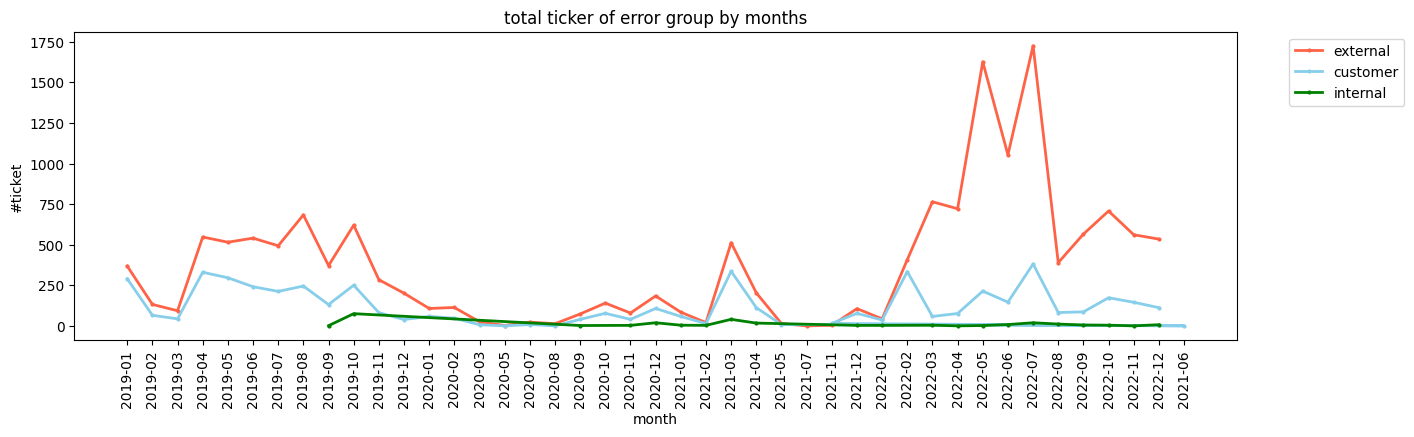

In [ ]:
# Phân bố nhóm lỗi
error_color_pairs = [
    ("external", "tomato"),
    ("customer", "skyblue"),
    ("internal", "green"),
]

plt.figure(figsize=(15, 4))

for error, color in error_color_pairs:
    df_err_line = df_error_group[df_error_group["error_group"] == error]
    plt.plot(
        df_err_line["year month"],
        df_err_line["n_ords"],
        label=error,
        marker="o",
        color=color,
        linewidth=2,
        markersize=2,
    )

plt.title("total ticker of error group by months")
plt.xlabel("month")
plt.ylabel("#ticket")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.show()

###### Nhóm lỗi external 2022 tăng đột biến


In [ ]:
# phân bổ mã lỗi
df_error = (
    df_join_all[df_join_all["status_id"] != 1]
    .groupby(["year month", "description"])
    .agg(n_ords=("ticket_id", "count"))
    .sort_values(by="year month", ascending=True)
    .reset_index()
)

In [158]:
df_error.head()

,year month,description,n_ords
0,2019-01,Insufficient funds in customer account. Please...,217
1,2019-01,No response from your bank,228
2,2019-01,Password locked due to multiple incorrect atte...,56
3,2019-01,Payment failed from bank,141
4,2019-01,Payment overdue,18


In [ ]:
df_error["description"].unique()

array(['Insufficient funds in customer account. Please add more funds and try the transaction again.',
       'No response from your bank',
       'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.',
       'Payment failed from bank', 'Payment overdue',
       'Transaction temporarily limited',
       'Need verify your account to continue'], dtype=object)

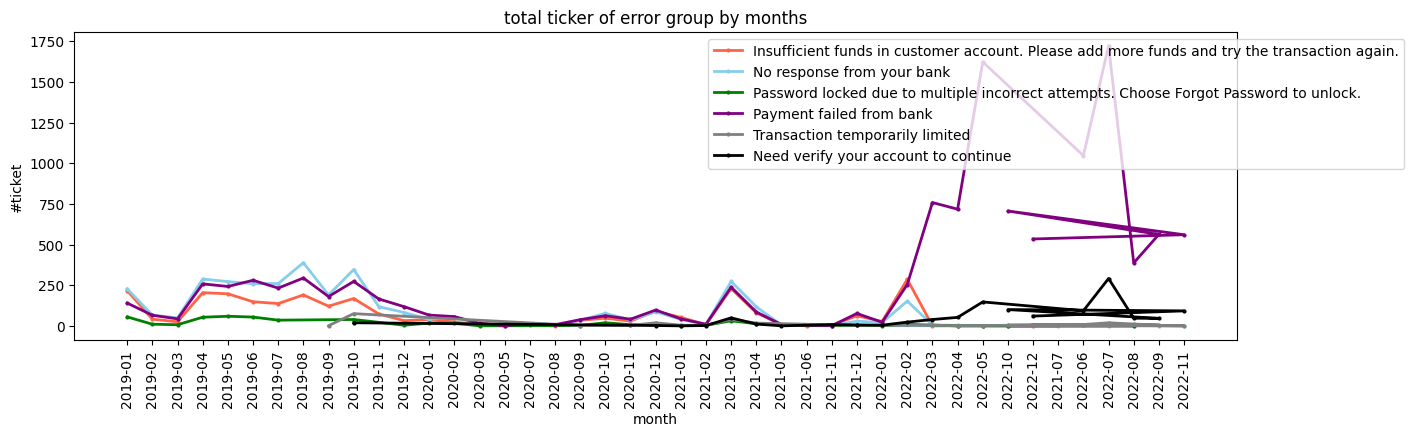

In [ ]:
# Phân bố mã lỗi
error_color_pairs = [
    (
        "Insufficient funds in customer account. Please add more funds and try the transaction again.",
        "tomato",
    ),
    ("No response from your bank", "skyblue"),
    (
        "Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.",
        "green",
    ),
    ("Payment failed from bank", "purple"),
    ("Transaction temporarily limited", "gray"),
    ("Need verify your account to continue", "black"),
]

plt.figure(figsize=(15, 4))

for error, color in error_color_pairs:
    df_err_line = df_error[df_error["description"] == error]
    plt.plot(
        df_err_line["year month"],
        df_err_line["n_ords"],
        label=error,
        marker="o",
        color=color,
        linewidth=2,
        markersize=2,
    )

plt.title("total ticker of error group by months")
plt.xlabel("month")
plt.ylabel("#ticket")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# lỗi đến từ bank tăng đột biến

###### success rate = 0 tại sao và như thế nào


In [ ]:
list_sr_0 = list(
    df_customer_value[df_customer_value["success_rate"] < 1.0]["customer_id"].unique()
)

In [ ]:
df_customer_value[df_customer_value["success_rate"] < 1.0]["customer_id"].nunique()

5465

In [ ]:
def calculate_n_promotion(x):
    return (x == "promotion").sum()


df_sr_0_metric = (
    df_join_all[df_join_all["customer_id"].isin(list_sr_0)]
    .groupby("customer_id")
    .agg(
        n_orders=("ticket_id", "count"),
        s_money=("original_price", "sum"),
        s_discount=("discount_value", "sum"),
        n_promotions=("type", calculate_n_promotion),
    )
    .reset_index()
)

In [ ]:
df_sr_0_metric["promotion_rate"] = (
    df_sr_0_metric["n_promotions"] / df_sr_0_metric["n_orders"]
)

df_sr_0_metric["discount_rate"] = (
    df_sr_0_metric["s_discount"] / df_sr_0_metric["s_money"]
)

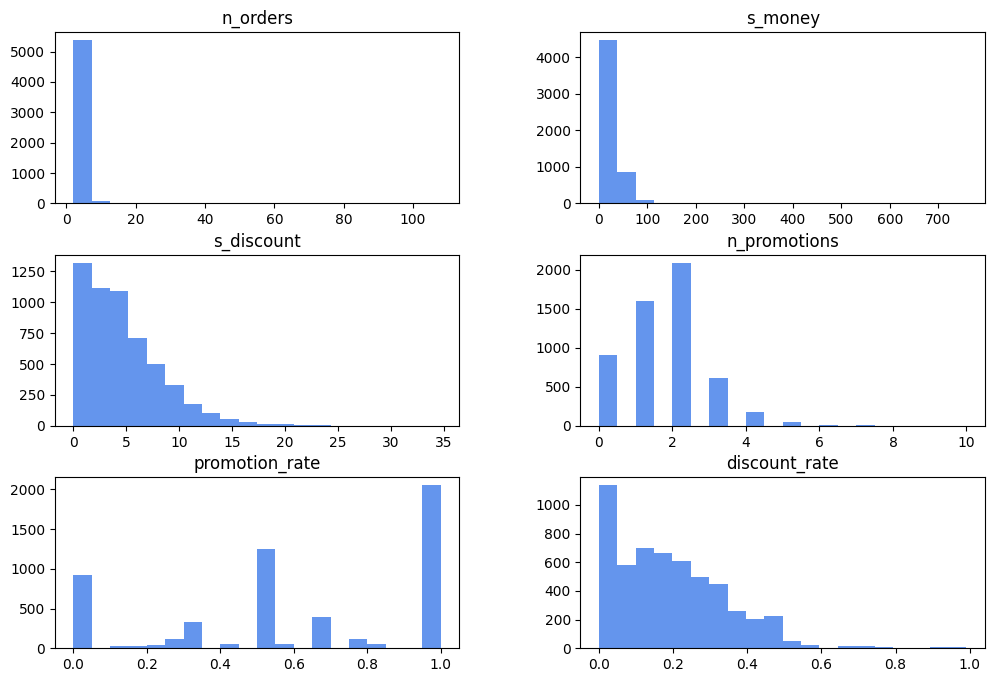

In [ ]:
df_sr_0_metric.iloc[:, 1:].hist(
    figsize=(12, 8), grid=False, color="cornflowerblue", bins=20
)
plt.show()

In [215]:
# Họ bị lỗi gì
df_error_0 = (
    df_join_all[
        (df_join_all["status_id"] != 1) & (df_join_all["customer_id"].isin(list_sr_0))
    ]
    .groupby(["year month", "description"])
    .agg(n_ords=("ticket_id", "count"))
    .sort_values(by="year month", ascending=True)
    .reset_index()
)

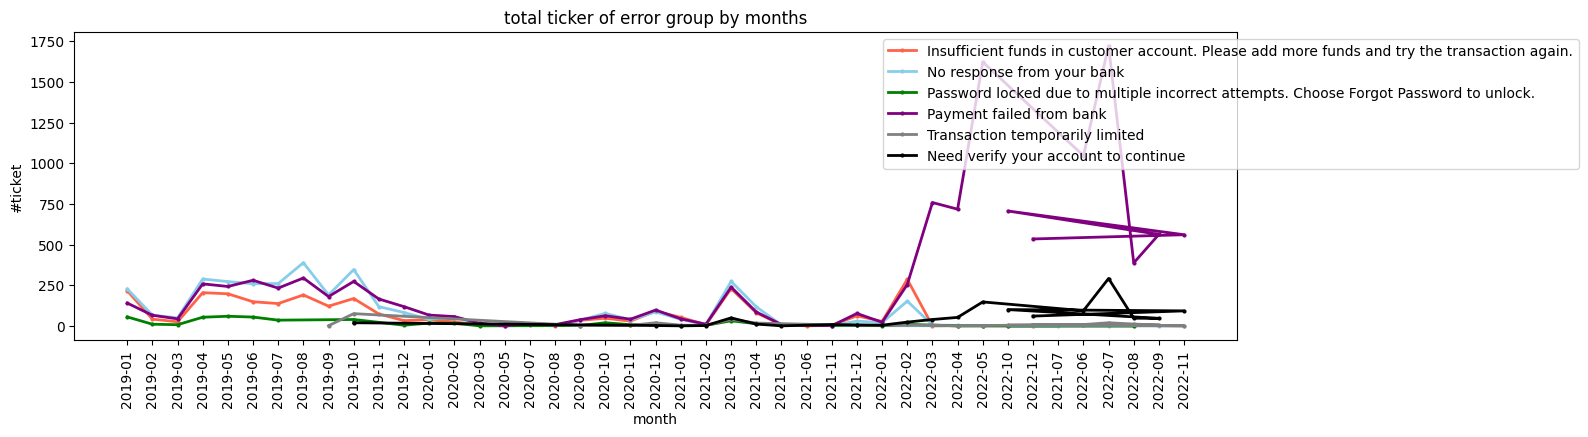

In [ ]:
# Phân bố mã lỗi
error_color_pairs = [
    (
        "Insufficient funds in customer account. Please add more funds and try the transaction again.",
        "tomato",
    ),
    ("No response from your bank", "skyblue"),
    (
        "Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.",
        "green",
    ),
    ("Payment failed from bank", "purple"),
    ("Transaction temporarily limited", "gray"),
    ("Need verify your account to continue", "black"),
]

plt.figure(figsize=(15, 4))

for error, color in error_color_pairs:
    df_err_line = df_error[df_error["description"] == error]
    plt.plot(
        df_err_line["year month"],
        df_err_line["n_ords"],
        label=error,
        marker="o",
        color=color,
        linewidth=2,
        markersize=2
    )

plt.title("total ticker of error group by months")
plt.xlabel("month")
plt.ylabel("#ticket")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

> **Note:**
>
> - Nhóm bị lỗi này cũng gần như là nhóm bị lỗi của toàn bộ khách hàng
> - Lý do họ lỗi là do và dừng lại là do:
>   - 1. Lỗi bên bank và họ không chủ động được
>   - 2. Lỗi định danh tài khoản -> nghi ngờ gian lận không đủ điểu kiện để nâng cấp tài khoản